 Data loaded successfully.
--- Data Inspection ---

Dataset Shape (Rows, Columns): (180519, 53)

First 5 records of the dataset:
       Type  Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  Sales per customer   Delivery Status  Late_delivery_risk  Category Id   Category Name Customer City Customer Country Customer Email Customer Fname  Customer Id Customer Lname Customer Password Customer Segment Customer State           Customer Street  Customer Zipcode  Department Id Department Name   Latitude   Longitude        Market  Order City Order Country  Order Customer Id order date (DateOrders)  Order Id  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Product Price  Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  Order Profit Per Order    Order Region      Order State     Order Status  Order Zipcode  Product Card Id  Product Category Id  Product Description                                 Pr

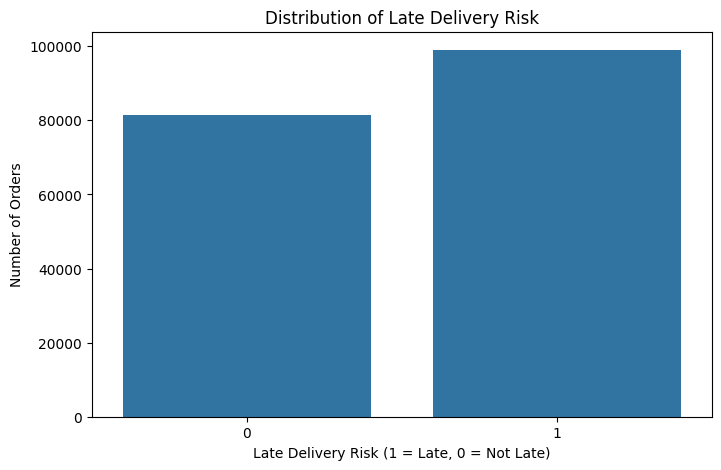


Available Shipping Modes:
Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

Number of orders with negative 'Benefit per order': 33784
Found orders with negative benefit, confirming the business reality as discussed in the plan.
Example of a negative benefit order:
   Order Id  Benefit per order Order Status   Sales
1     75939        -249.089996      PENDING  327.75

Data types of date-related columns:
order date (DateOrders)       object
shipping date (DateOrders)    object
dtype: object

This confirms that date columns must be converted to datetime objects in the next phase.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv('datacosupplychaindataset.csv', encoding='latin1')
print(" Data loaded successfully.")

print("--- Data Inspection ---")
print(f"\nDataset Shape (Rows, Columns): {df.shape}")

print("\nFirst 5 records of the dataset:")
print(df.head())

print("\nData Types and Non-Null Counts:")
df.info()

print(" Statistical Summary of Numerical Features ---")
print(df.describe())

print("Statistical Summary of Categorical Features ---")
print(df.describe(include=['object']))

print(" Checks---")
print("\nDistribution of the Target Variable ('Late_delivery_risk'):")
target_distribution = df['Late_delivery_risk'].value_counts(normalize=True) * 100
print(target_distribution)

plt.figure(figsize=(8, 5))
sns.countplot(x='Late_delivery_risk', data=df)
plt.title('Distribution of Late Delivery Risk')
plt.ylabel('Number of Orders')
plt.xlabel('Late Delivery Risk (1 = Late, 0 = Not Late)')
plt.show()

print("\nAvailable Shipping Modes:")
print(df['Shipping Mode'].value_counts())

negative_benefit_orders = df[df['Benefit per order'] < 0]
print(f"\nNumber of orders with negative 'Benefit per order': {len(negative_benefit_orders)}")
if len(negative_benefit_orders) > 0:
    print("Found orders with negative benefit, confirming the business reality as discussed in the plan.")
    print("Example of a negative benefit order:")
    print(negative_benefit_orders[['Order Id', 'Benefit per order', 'Order Status', 'Sales']].head(1))


print("\nData types of date-related columns:")
print(df[['order date (DateOrders)', 'shipping date (DateOrders)']].dtypes)
print("\nThis confirms that date columns must be converted to datetime objects in the next phase.")



In [2]:
print("---  Data Cleaning ---")
print(f"Original DataFrame shape: {df.shape}")

unusable_columns = [
    'Order Zipcode', 'Product Description', 'Product Status',
    'Customer Email', 'Customer Password'
]

# Group 2: Redundant columns
redundant_columns = [
    'Order Profit Per Order', 'Order Item Total', 'Order Customer Id',
    'Product Category Id', 'Order Item Cardprod Id', 'Order Item Product Price'
]

total_columns_to_drop = unusable_columns + redundant_columns

print(f"\nIdentified {len(total_columns_to_drop)} columns for removal.")


df_clean = df.drop(columns=total_columns_to_drop)



print("\n--- Verification of Cleaning ---")
print(f"New Clean DataFrame shape: {df_clean.shape}")
print(f"Successfully removed {df.shape[1] - df_clean.shape[1]} columns.")

print("\nVerifying the first 5 rows of the clean DataFrame:")
print(df_clean.head(5)) 


---  Data Cleaning ---
Original DataFrame shape: (180519, 53)

Identified 11 columns for removal.

--- Verification of Cleaning ---
New Clean DataFrame shape: (180519, 42)
Successfully removed 11 columns.

Verifying the first 5 rows of the clean DataFrame:
       Type  Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  Sales per customer   Delivery Status  Late_delivery_risk  Category Id   Category Name Customer City Customer Country Customer Fname  Customer Id Customer Lname Customer Segment Customer State           Customer Street  Customer Zipcode  Department Id Department Name   Latitude   Longitude        Market  Order City Order Country order date (DateOrders)  Order Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Profit Ratio  Order Item Quantity   Sales    Order Region      Order State     Order Status  Product Card Id                                 Product Image  Product Name  Product Price shipping date (DateOrders)   Shi

In [3]:
print("\nHandling missing values by dropping rows...")
print(f"Shape before dropping nulls: {df_clean.shape}")
print(f"Nulls in 'Customer Lname' before: {df_clean['Customer Lname'].isnull().sum()}")
print(f"Nulls in 'Customer Zipcode' before: {df_clean['Customer Zipcode'].isnull().sum()}")

df_clean.dropna(subset=['Customer Lname', 'Customer Zipcode'], inplace=True)

print(f"\nShape after dropping nulls: {df_clean.shape}")
print(f"Nulls in 'Customer Lname' after: {df_clean['Customer Lname'].isnull().sum()}")
print(f"Nulls in 'Customer Zipcode' after: {df_clean['Customer Zipcode'].isnull().sum()}")
print(" Rows with null values dropped.")


print("\nConverting date columns to 'datetime'...")
df_clean['order date (DateOrders)'] = pd.to_datetime(df_clean['order date (DateOrders)'])
df_clean['shipping date (DateOrders)'] = pd.to_datetime(df_clean['shipping date (DateOrders)'])
print(" Date columns converted.")

print("\nEngineering new features...")

df_clean['delivery_performance_gap'] = df_clean['Days for shipment (scheduled)'] - df_clean['Days for shipping (real)']
print("  - 'delivery_performance_gap' feature created.")

df_clean['order_month'] = df_clean['order date (DateOrders)'].dt.month
df_clean['order_day_of_week'] = df_clean['order date (DateOrders)'].dt.dayofweek
df_clean['order_hour_of_day'] = df_clean['order date (DateOrders)'].dt.hour
print("  - Temporal features created.")
print(" Feature engineering complete.")


print("\n---  Verification ---")
print(f"Final DataFrame shape: {df_clean.shape}")
print(f"Final check for any remaining null values: {df_clean.isnull().sum().sum()}")



Handling missing values by dropping rows...
Shape before dropping nulls: (180519, 42)
Nulls in 'Customer Lname' before: 8
Nulls in 'Customer Zipcode' before: 3

Shape after dropping nulls: (180508, 42)
Nulls in 'Customer Lname' after: 0
Nulls in 'Customer Zipcode' after: 0
 Rows with null values dropped.

Converting date columns to 'datetime'...
 Date columns converted.

Engineering new features...
  - 'delivery_performance_gap' feature created.
  - Temporal features created.
 Feature engineering complete.

---  Verification ---
Final DataFrame shape: (180508, 46)
Final check for any remaining null values: 0


In [4]:

print("\n---  Feature Engineering ---")


df_clean = df_clean.sort_values('order date (DateOrders)').reset_index(drop=True)
print(" DataFrame sorted by 'order date (DateOrders)'.")

print("Creating time-decayed historical features (EWMA)...")


ewm_span = 30

df_clean['customer_ewm_sales'] = df_clean.groupby('Customer Id')['Sales per customer'].transform(
    lambda x: x.ewm(span=ewm_span).mean().shift(1)
)

df_clean['product_ewm_profit_ratio'] = df_clean.groupby('Product Card Id')['Order Item Profit Ratio'].transform(
    lambda x: x.ewm(span=ewm_span).mean().shift(1)
)
print("  - Dynamic customer sales and product profit features created.")


print("Creating behavioral volatility features (Expanding Standard Deviation)...")


df_clean['customer_historical_sales_std'] = df_clean.groupby('Customer Id')['Sales per customer'].transform(
    lambda x: x.expanding().std().shift(1)
)

df_clean['product_historical_profit_ratio_std'] = df_clean.groupby('Product Card Id')['Order Item Profit Ratio'].transform(
    lambda x: x.expanding().std().shift(1)
)
print("  - Customer and product volatility features created.")

df_clean.fillna(0, inplace=True)
print(" Advanced features created and cold-start NaNs handled.")




---  Feature Engineering ---
 DataFrame sorted by 'order date (DateOrders)'.
Creating time-decayed historical features (EWMA)...
  - Dynamic customer sales and product profit features created.
Creating behavioral volatility features (Expanding Standard Deviation)...
  - Customer and product volatility features created.
 Advanced features created and cold-start NaNs handled.


In [5]:
df_clean.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Card Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,delivery_performance_gap,order_month,order_day_of_week,order_hour_of_day,customer_ewm_sales,product_ewm_profit_ratio,customer_historical_sales_std,product_historical_profit_ratio_std
0,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,EE. UU.,Mary,11599,Malone,Consumer,NC,8708 Indian Horse Highway,28601.0,7,Fan Shop,35.776661,-81.362625,LATAM,Mexico City,México,2015-01-01 00:00:00,1,60.0,0.20,1,0.37,1,299.980011,Central America,Distrito Federal,CLOSED,957,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,2015-01-03 00:00:00,Standard Class,2,1,3,0,0.0000,0.0,0.000000,0.0
1,PAYMENT,3,4,68.250000,227.500000,Advance shipping,0,24,Women's Apparel,Chicago,EE. UU.,David,256,Rodriguez,Consumer,IL,7605 Tawny Horse Falls,60625.0,5,Golf,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,2015-01-01 00:21:00,2,22.5,0.09,3,0.30,5,250.000000,South America,Risaralda,PENDING_PAYMENT,502,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2015-01-04 00:21:00,Standard Class,1,1,3,0,0.0000,0.0,0.000000,0.0
2,PAYMENT,3,4,36.470001,107.889999,Advance shipping,0,18,Men's Footwear,Chicago,EE. UU.,David,256,Rodriguez,Consumer,IL,7605 Tawny Horse Falls,60625.0,4,Apparel,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,2015-01-01 00:21:00,2,22.1,0.17,4,0.34,1,129.990005,South America,Risaralda,PENDING_PAYMENT,403,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,2015-01-04 00:21:00,Standard Class,1,1,3,0,227.5000,0.0,0.000000,0.0
3,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,EE. UU.,David,256,Rodriguez,Consumer,IL,7605 Tawny Horse Falls,60625.0,7,Fan Shop,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,2015-01-01 00:21:00,2,6.0,0.03,2,0.47,1,199.990005,South America,Risaralda,PENDING_PAYMENT,1073,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,2015-01-04 00:21:00,Standard Class,1,1,3,0,165.7015,0.0,84.577043,0.0
4,CASH,5,4,60.270000,123.000000,Late delivery,1,24,Women's Apparel,San Antonio,EE. UU.,Brian,8827,Wilson,Home Office,TX,8396 High Corners,78240.0,5,Golf,29.520010,-98.637413,LATAM,Dos Quebradas,Colombia,2015-01-01 01:03:00,4,27.0,0.18,7,0.49,3,150.000000,South America,Risaralda,CLOSED,502,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2015-01-06 01:03:00,Standard Class,-1,1,3,1,0.0000,0.3,0.000000,0.0


--- 1. Univariate Analysis ---

Plotting distribution of key numerical features...


<Figure size 1200x600 with 0 Axes>

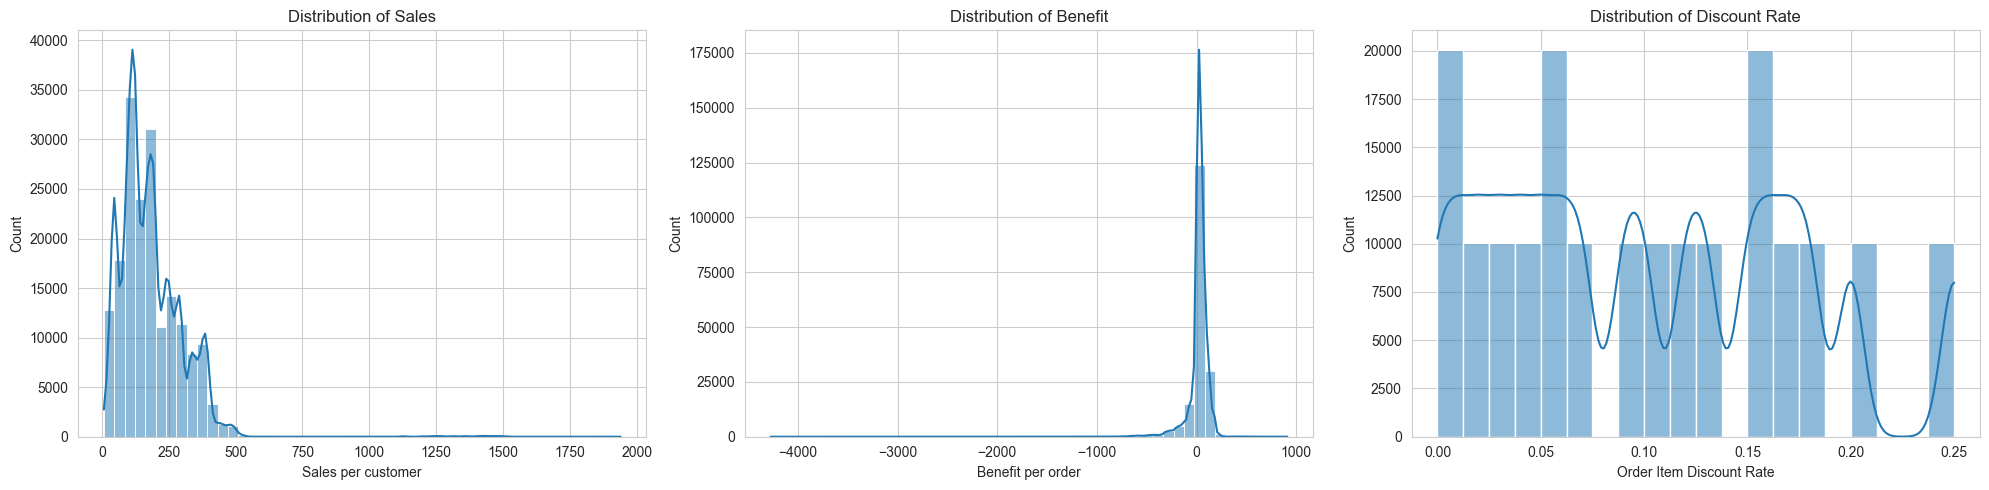


Plotting distribution of key categorical features...


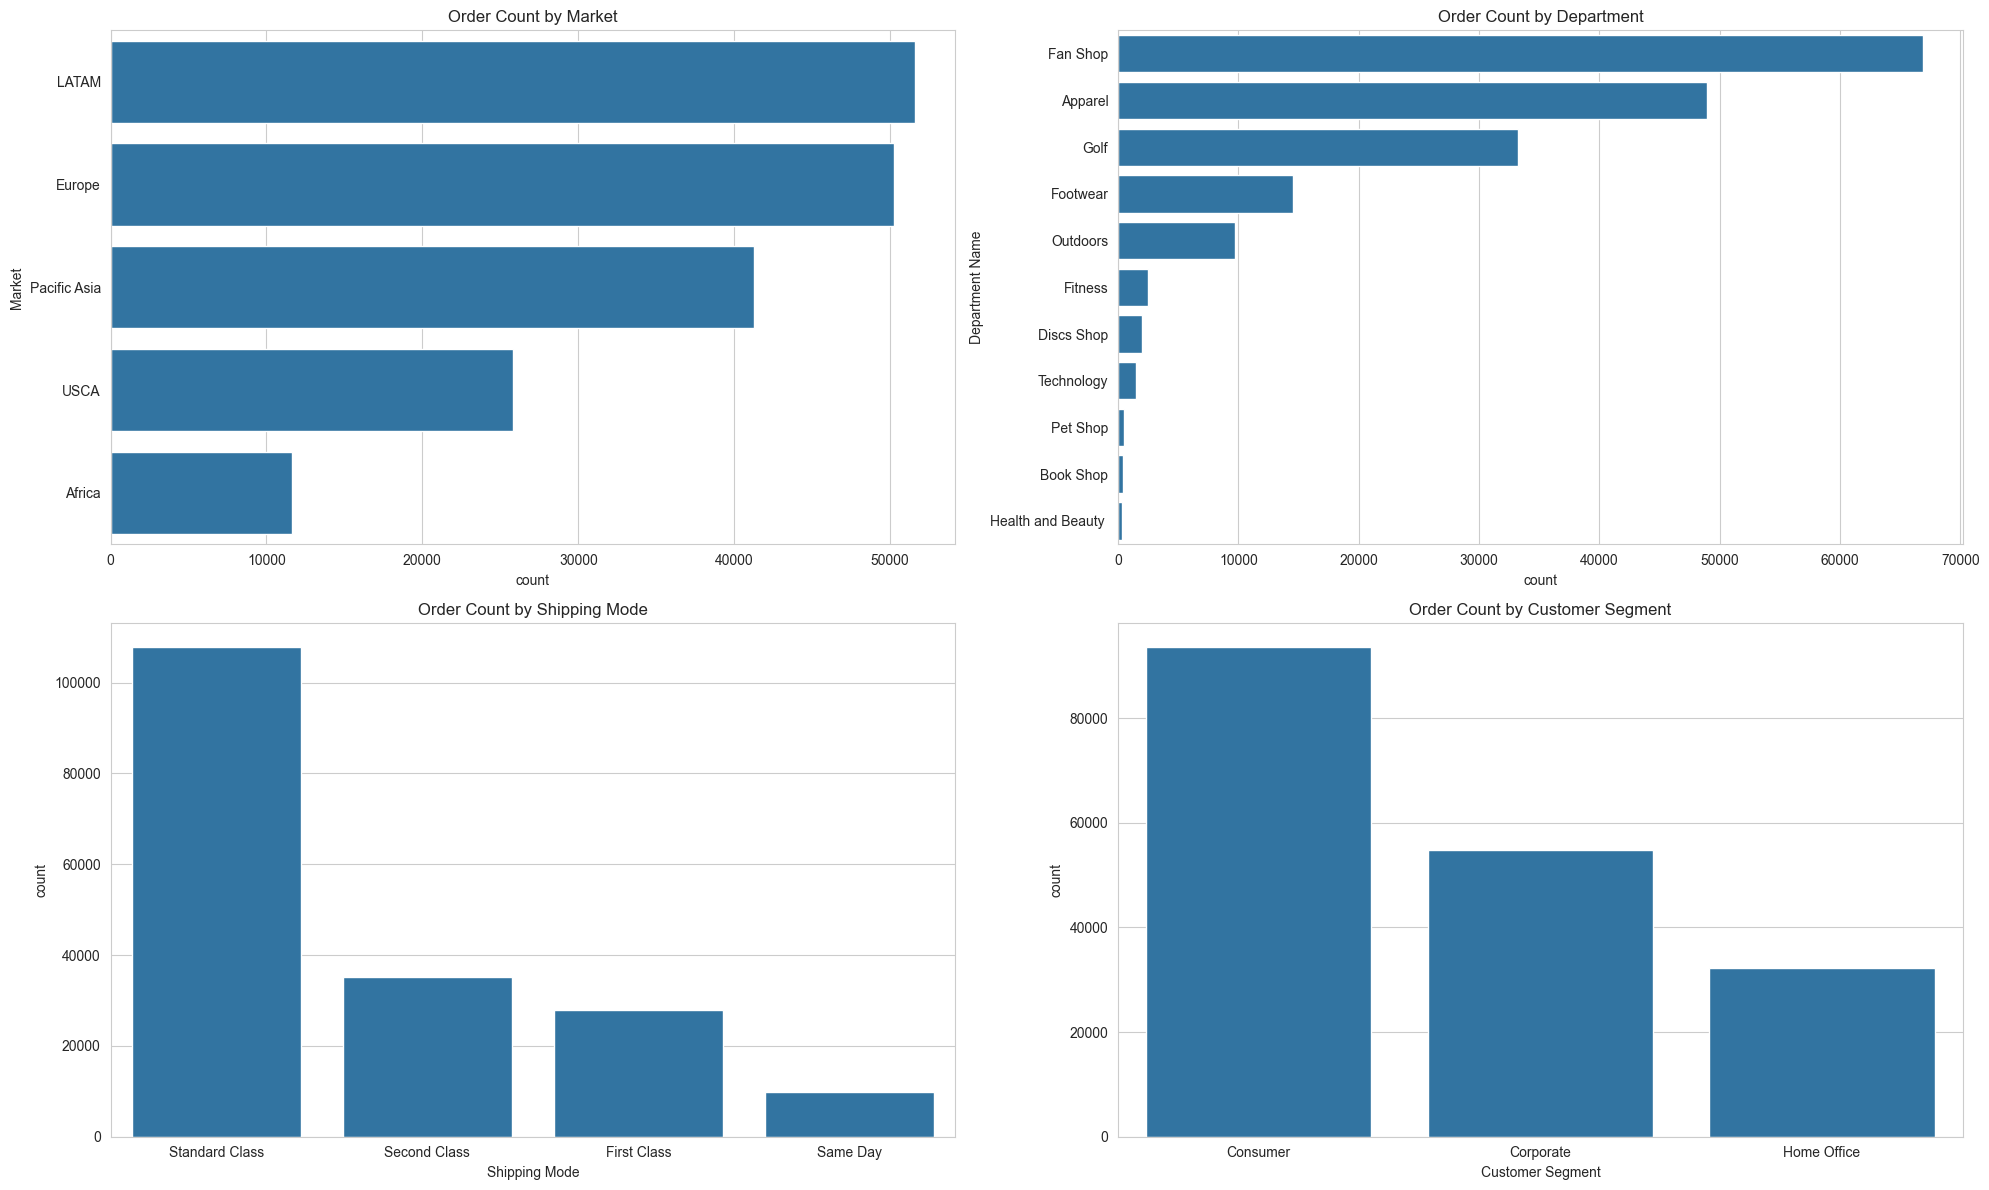


---  Bivariate Analysis (vs. Target) ---

Analyzing late delivery rate across key categories...


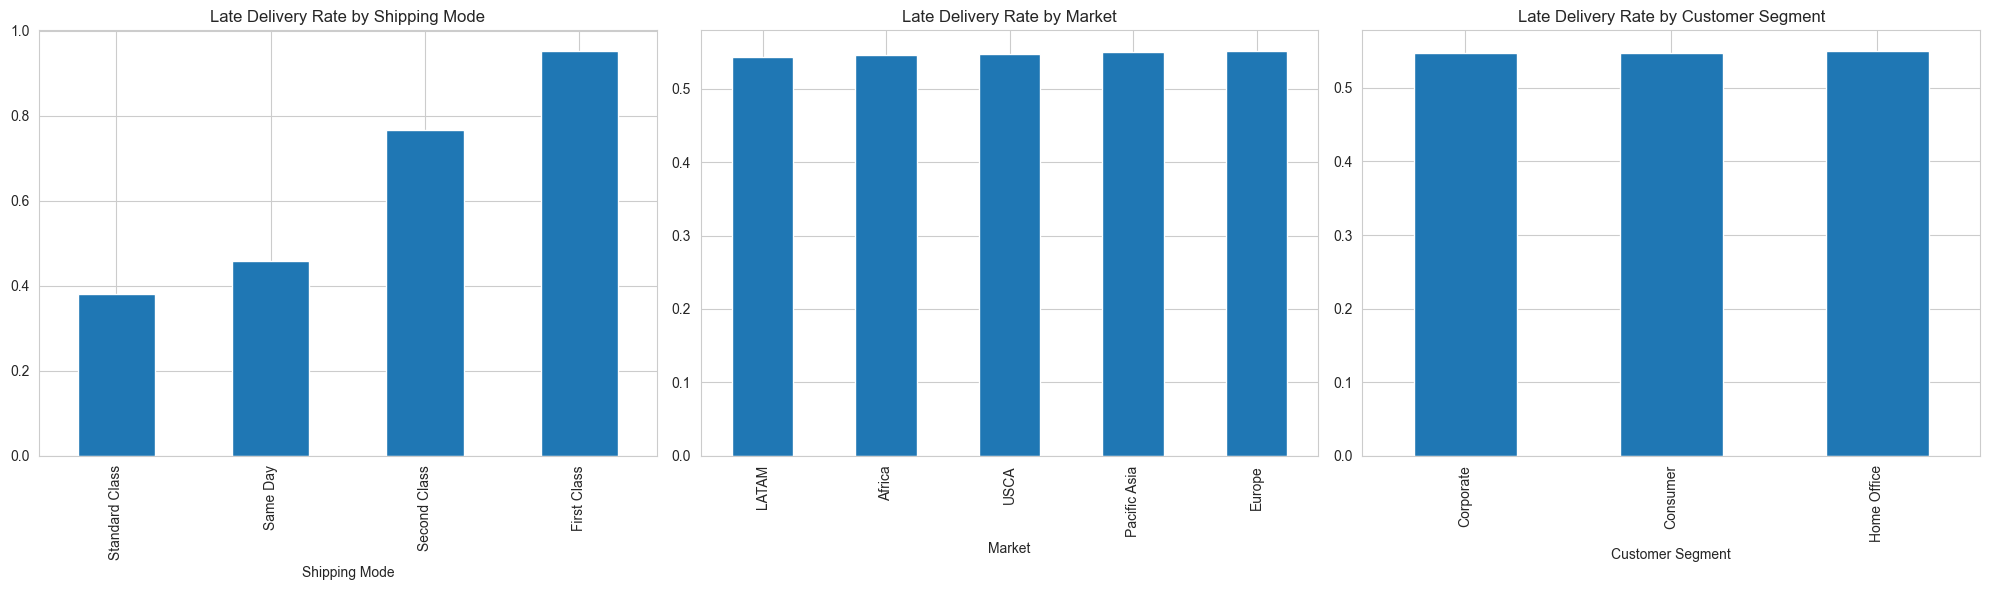


Analyzing numerical feature distributions by delivery status...


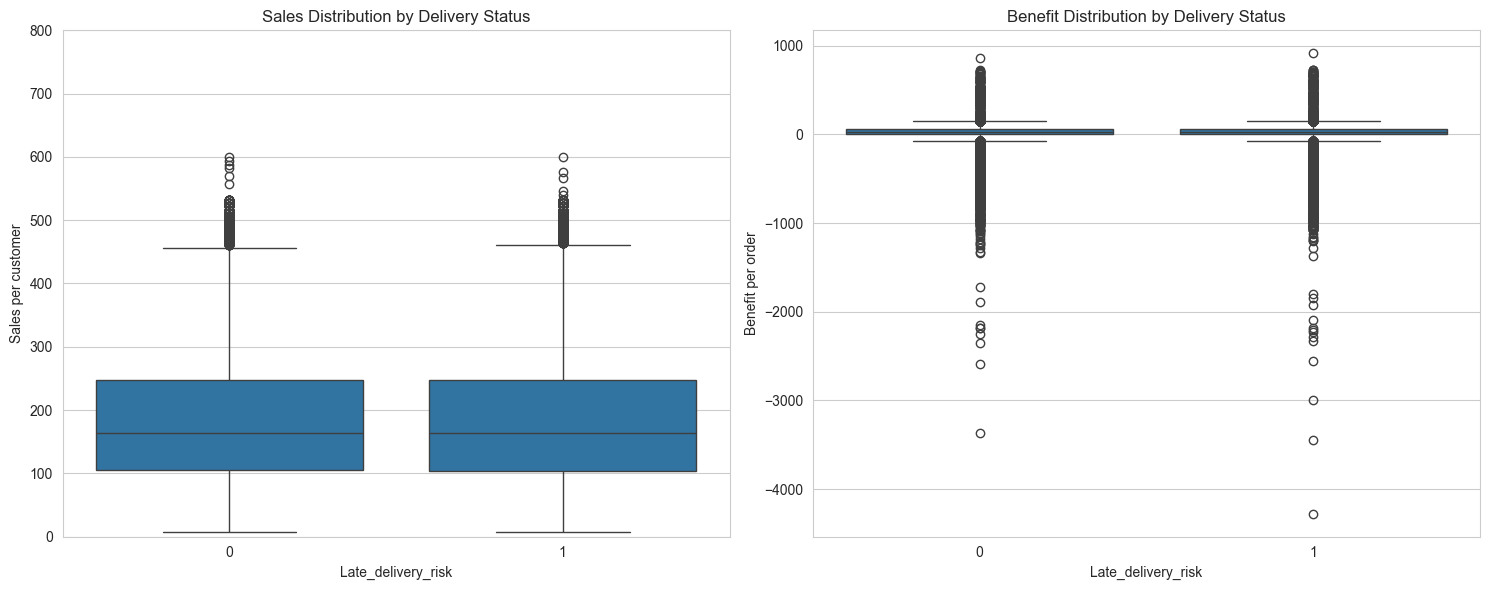


---  Multivariate Analysis ---

Plotting correlation heatmap for numerical features...


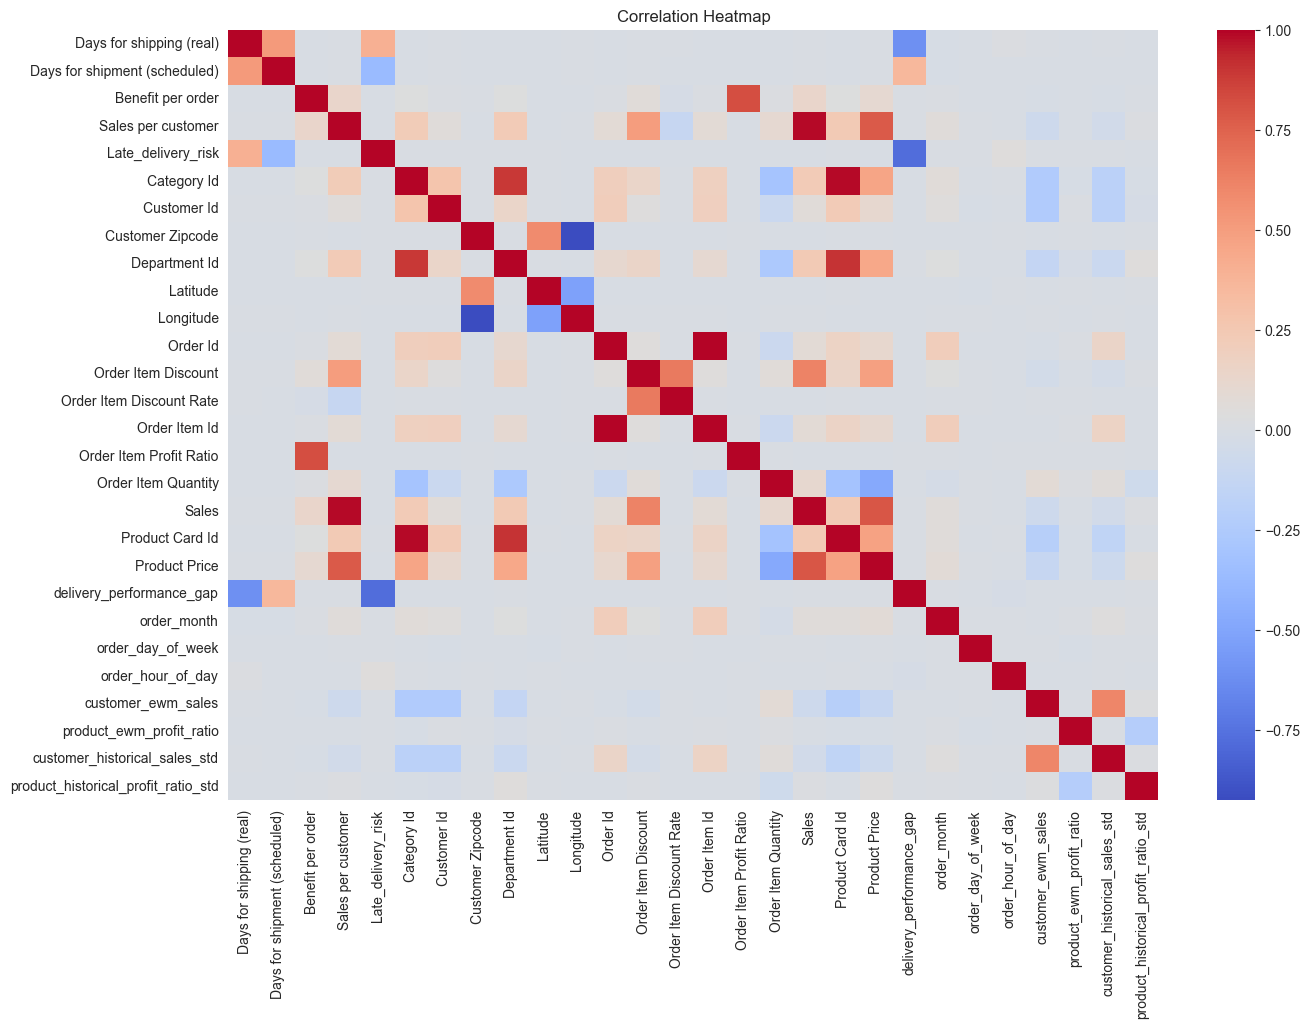


Analyzing Sales vs. Benefit interaction by delivery status...


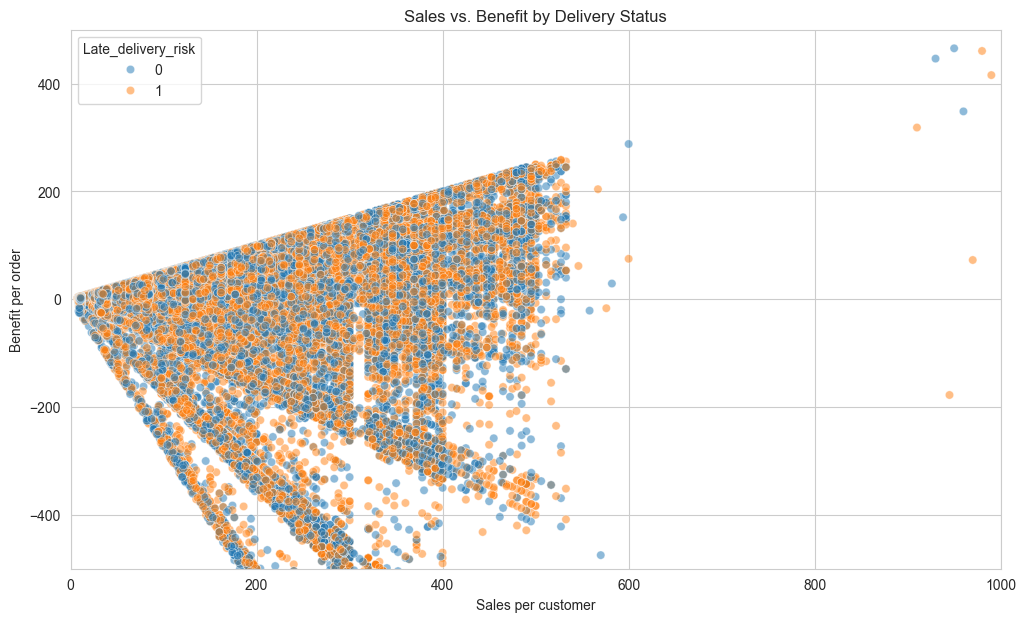


---  Temporal & Geospatial Analysis ---

Analyzing late delivery rate trend over time...


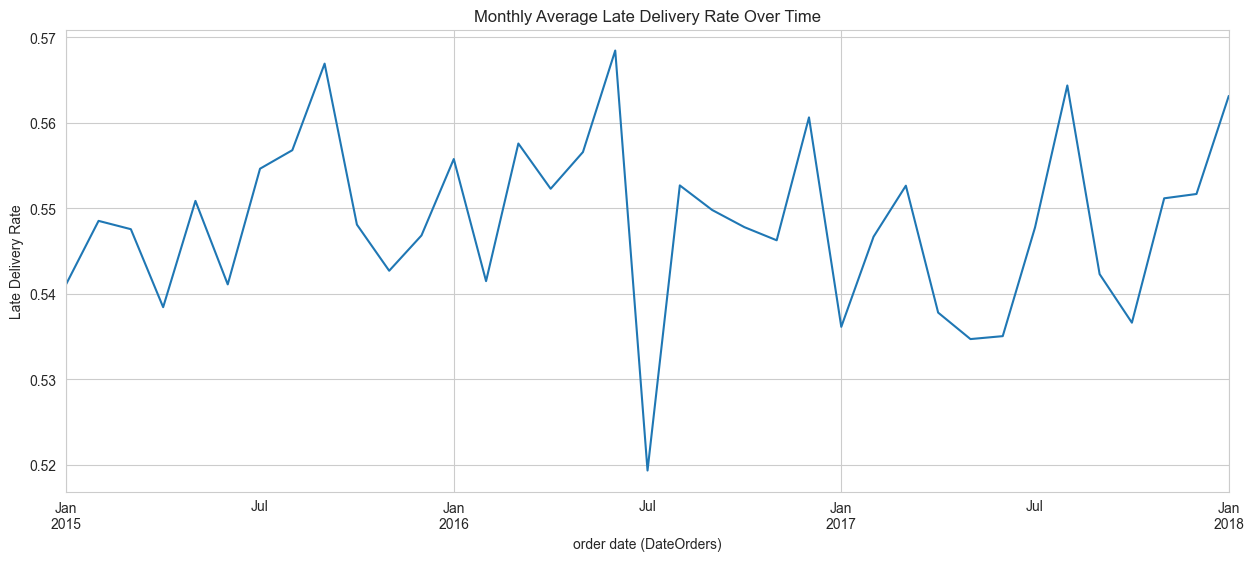


Identifying top 10 cities with the highest late delivery rates...


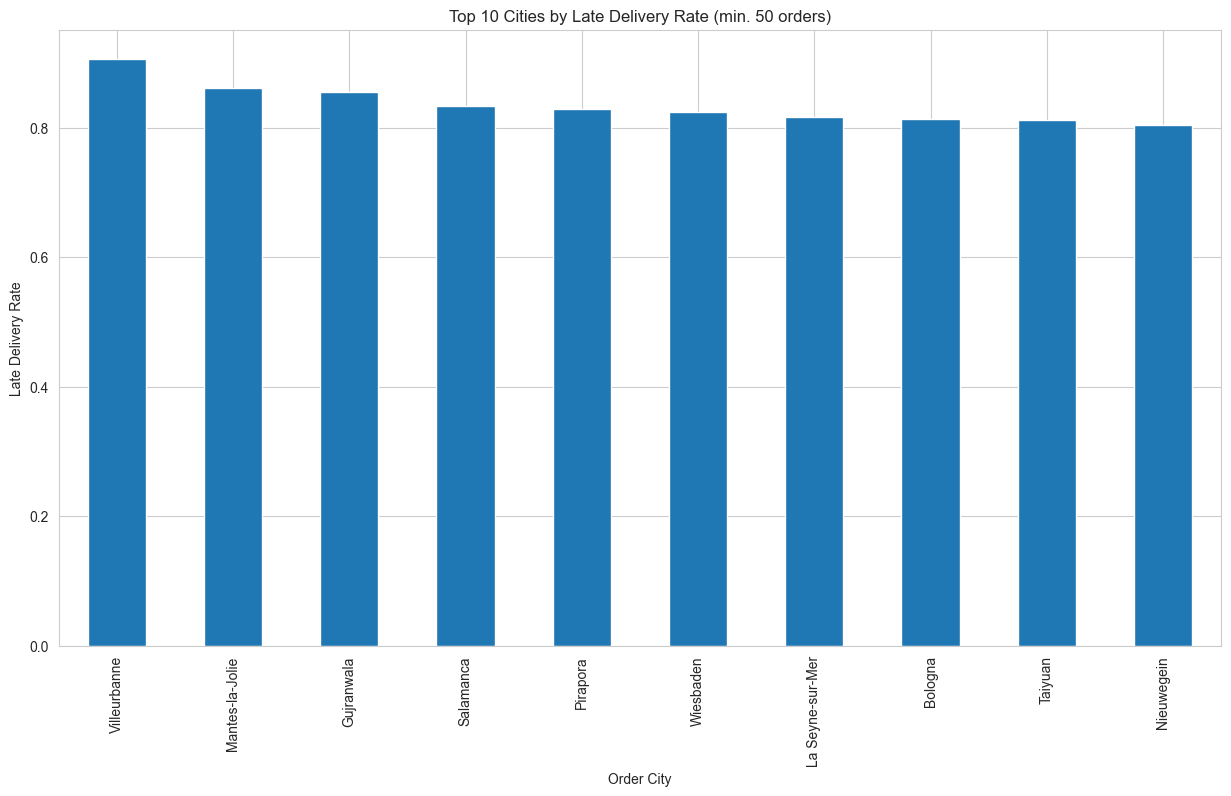


 Exploratory Data Analysis is complete.


In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6)) 

print("--- 1. Univariate Analysis ---")

print("\nPlotting distribution of key numerical features...")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(df_clean['Sales per customer'], bins=50, kde=True, ax=axes[0]).set_title('Distribution of Sales')
sns.histplot(df_clean['Benefit per order'], bins=50, kde=True, ax=axes[1]).set_title('Distribution of Benefit')
sns.histplot(df_clean['Order Item Discount Rate'], bins=20, kde=True, ax=axes[2]).set_title('Distribution of Discount Rate')
plt.tight_layout()
plt.show()


# . Distribution of Key Categorical Features
print("\nPlotting distribution of key categorical features...")
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(y=df_clean['Market'], ax=axes[0, 0], order=df_clean['Market'].value_counts().index).set_title('Order Count by Market')
sns.countplot(y=df_clean['Department Name'], ax=axes[0, 1], order=df_clean['Department Name'].value_counts().index).set_title('Order Count by Department')
sns.countplot(x=df_clean['Shipping Mode'], ax=axes[1, 0], order=df_clean['Shipping Mode'].value_counts().index).set_title('Order Count by Shipping Mode')
sns.countplot(x=df_clean['Customer Segment'], ax=axes[1, 1], order=df_clean['Customer Segment'].value_counts().index).set_title('Order Count by Customer Segment')
plt.tight_layout()
plt.show()



print("\n---  Bivariate Analysis (vs. Target) ---")


print("\nAnalyzing late delivery rate across key categories...")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
df_clean.groupby('Shipping Mode')['Late_delivery_risk'].mean().sort_values().plot(kind='bar', ax=axes[0], title='Late Delivery Rate by Shipping Mode')
df_clean.groupby('Market')['Late_delivery_risk'].mean().sort_values().plot(kind='bar', ax=axes[1], title='Late Delivery Rate by Market')
df_clean.groupby('Customer Segment')['Late_delivery_risk'].mean().sort_values().plot(kind='bar', ax=axes[2], title='Late Delivery Rate by Customer Segment')
plt.tight_layout()
plt.show()


print("\nAnalyzing numerical feature distributions by delivery status...")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Late_delivery_risk', y='Sales per customer', data=df_clean, ax=axes[0]).set_title('Sales Distribution by Delivery Status')
axes[0].set_ylim(0, 800)
sns.boxplot(x='Late_delivery_risk', y='Benefit per order', data=df_clean, ax=axes[1]).set_title('Benefit Distribution by Delivery Status')
plt.tight_layout()
plt.show()

print("\n---  Multivariate Analysis ---")

# Correlation Heatmap for Numerical Features
print("\nPlotting correlation heatmap for numerical features...")
plt.figure(figsize=(15, 10))

numerical_df = df_clean.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm').set_title('Correlation Heatmap')
plt.show()

print("\nAnalyzing Sales vs. Benefit interaction by delivery status...")
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Sales per customer', y='Benefit per order', hue='Late_delivery_risk', data=df_clean, alpha=0.5)
plt.title('Sales vs. Benefit by Delivery Status')
plt.xlim(0, 1000) 
plt.ylim(-500, 500)
plt.show()

print("\n---  Temporal & Geospatial Analysis ---")

print("\nAnalyzing late delivery rate trend over time...")
df_temporal = df_clean.set_index('order date (DateOrders)').sort_index()
monthly_late_rate = df_temporal['Late_delivery_risk'].resample('ME').mean()
monthly_late_rate = df_temporal['Late_delivery_risk'].resample('ME').mean()

plt.figure(figsize=(15, 6))
monthly_late_rate.plot(title='Monthly Average Late Delivery Rate Over Time')
plt.ylabel('Late Delivery Rate')
plt.show()

#  Geospatial Analysis: Top 10 Cities with Highest Late Delivery Rate
print("\nIdentifying top 10 cities with the highest late delivery rates...")
city_counts = df_clean['Order City'].value_counts()
meaningful_cities = city_counts[city_counts > 50].index
df_meaningful_cities = df_clean[df_clean['Order City'].isin(meaningful_cities)]

city_late_rate = df_meaningful_cities.groupby('Order City')['Late_delivery_risk'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
city_late_rate.head(10).plot(kind='bar', title='Top 10 Cities by Late Delivery Rate (min. 50 orders)')
plt.ylabel('Late Delivery Rate')
plt.show()


print("\n Exploratory Data Analysis is complete.")

In [7]:

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

print( "Defining Feature Set and Target ---")
target_column = 'Late_delivery_risk'
y = df_clean[target_column]
non_feature_columns = [
    'Type', 'Delivery Status', 'Customer Fname', 'Customer Lname', 'Customer Street',
    'Customer Id', 'order date (DateOrders)', 'shipping date (DateOrders)', 
    'Order Id', 'Order Item Id', 'Product Image', 'Product Name', target_column,
    'Days for shipping (real)', 
    'delivery_performance_gap' 
]
X = df_clean.drop(columns=non_feature_columns)

print("\n--- Performing Time-Based Data Split ---")
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
print(f"Data split into training ({len(X_train)} rows) and testing ({len(X_test)} rows).")

print("\n--- Pipeline ---")

# Identify feature types
spatial_features = ['Latitude', 'Longitude']
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = [col for col in X_train.select_dtypes(include=np.number).columns if col not in spatial_features]

# Define the transformers
numeric_transformer = PowerTransformer(method='yeo-johnson')
spatial_transformer = StandardScaler()

categorical_transformer = ce.TargetEncoder(
    handle_unknown='value',
    handle_missing='value',
    smoothing=10.0  
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('spatial', spatial_transformer, spatial_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

preprocessor.fit(X_train, y_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

transformed_cols = numerical_features + spatial_features + categorical_features
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_cols, index=X_train.index)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_cols, index=X_test.index)

print(X_train_transformed_df.head())



Defining Feature Set and Target ---

--- Performing Time-Based Data Split ---
Data split into training (144406 rows) and testing (36102 rows).

--- Pipeline ---
   Days for shipment (scheduled)  Benefit per order  Sales per customer  Category Id  Customer Zipcode  Department Id  Order Item Discount  Order Item Discount Rate  Order Item Profit Ratio  Order Item Quantity     Sales  Product Card Id  Product Price  order_month  order_day_of_week  order_hour_of_day  customer_ewm_sales  product_ewm_profit_ratio  customer_historical_sales_std  product_historical_profit_ratio_std  Latitude  Longitude  Category Name  Customer City  Customer Country  Customer Segment  Customer State  Department Name    Market  Order City  Order Country  Order Region  Order State  Order Status  Shipping Mode
0                       0.802814           0.993062            0.731148     0.938588          0.462764        1.12313             1.606879                  1.334194                 0.684596            -0.9200

In [10]:
import time
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
warnings.filterwarnings("ignore", category=ConvergenceWarning)

print("--- Model Portfolio ---")

models = {
    # --- Baselines Models ---
    "Linear Regression (as Classifier)": LinearRegression(),
    "Ridge Regression (L2)": Ridge(random_state=42),
    "Lasso Regression (L1)": Lasso(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),

    # --- Non-Linear Models ---
    "Decision Tree": DecisionTreeClassifier(random_state=42),


    # ---  Ensembles ---
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(random_state=42, verbose=0), 

    # --- Deep Learning ---
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=500)
}

print(f"Defined {len(models)} individual models .")

print("\n---  Training and Evaluating All Models ---")

results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    training_time = time.time() - start_time

    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]
        y_pred = (y_pred_proba >= 0.5).astype(int)
    else:
        # Regression models
        y_pred_scores = model.predict(X_test_transformed)
        y_pred_proba = y_pred_scores 
        y_pred = (y_pred_scores >= 0.5).astype(int)

    # --- Metric Calculation ---
    results[model_name] = {
        "Training Time (s)": round(training_time, 2),
        "Precision (Late=1)": precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        "Recall (Late=1)": recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        "F1-Score (Late=1)": f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba)
    }
    print(f"Finished training in {training_time:.2f} seconds.")

print("\n---  Training Advanced Ensembles ---")

estimators = [
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('lgbm', lgb.LGBMClassifier(random_state=42))
]

# --- Voting Classifier ---
print("\nTraining Voting Classifier...")
start_time = time.time()
voting_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting_clf.fit(X_train_transformed, y_train)
training_time = time.time() - start_time

y_pred_proba = voting_clf.predict_proba(X_test_transformed)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

results["Voting Ensemble"] = {
    "Training Time (s)": round(training_time, 2),
    "Precision (Late=1)": precision_score(y_test, y_pred, pos_label=1),
    "Recall (Late=1)": recall_score(y_test, y_pred, pos_label=1),
    "F1-Score (Late=1)": f1_score(y_test, y_pred, pos_label=1),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba)
}
print(f"Finished training in {training_time:.2f} seconds.")

# --- Stacking Classifier ---
print("\nTraining Stacking Classifier...")
start_time = time.time()
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5, n_jobs=-1)
stacking_clf.fit(X_train_transformed, y_train)
training_time = time.time() - start_time

y_pred_proba = stacking_clf.predict_proba(X_test_transformed)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

results["Stacking Ensemble"] = {
    "Training Time (s)": round(training_time, 2),
    "Precision (Late=1)": precision_score(y_test, y_pred, pos_label=1),
    "Recall (Late=1)": recall_score(y_test, y_pred, pos_label=1),
    "F1-Score (Late=1)": f1_score(y_test, y_pred, pos_label=1),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba)
}
print(f"Finished training in {training_time:.2f} seconds.")

print("\n--- Final Results ---")

results_df = pd.DataFrame(results).T.sort_values(by="ROC AUC", ascending=False)
for col in results_df.columns:
    if col != "Training Time (s)":
        results_df[col] = results_df[col].apply(lambda x: f"{x:.4f}")

print(results_df)

print("\n--- Analysis ---")
best_model_name = results_df.index[0]
print(f"\nThe '{best_model_name}' emerged as the top-performing model based on ROC AUC.")


--- Model Portfolio ---
Defined 11 individual models .

---  Training and Evaluating All Models ---

Training Linear Regression (as Classifier)...
Finished training in 0.33 seconds.

Training Ridge Regression (L2)...
Finished training in 0.07 seconds.

Training Lasso Regression (L1)...
Finished training in 0.08 seconds.

Training Logistic Regression...
Finished training in 2.47 seconds.

Training Decision Tree...
Finished training in 4.66 seconds.

Training Random Forest...
Finished training in 14.51 seconds.

Training Gradient Boosting...
Finished training in 75.01 seconds.

Training XGBoost...
Finished training in 1.33 seconds.

Training LightGBM...
[LightGBM] [Info] Number of positive: 79236, number of negative: 65170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3980
[LightGBM] [Info] Number of data points in the train set: 144406, number 

e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Finished training in 1.63 seconds.

Training CatBoost...
Finished training in 34.30 seconds.

Training MLP Classifier...
Finished training in 82.75 seconds.

---  Training Advanced Ensembles ---

Training Voting Classifier...


e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Finished training in 21.65 seconds.

Training Stacking Classifier...
Finished training in 106.67 seconds.

--- Final Results ---
                                   Training Time (s) Precision (Late=1) Recall (Late=1) F1-Score (Late=1) ROC AUC
Gradient Boosting                              75.01             0.7754          0.7033            0.7376  0.8131
Stacking Ensemble                             106.67             0.7624          0.7130            0.7368  0.8110
LightGBM                                        1.63             0.7726          0.6987            0.7338  0.8105
Voting Ensemble                                21.65             0.7773          0.6972            0.7351  0.8092
Random Forest                                  14.51             0.7632          0.7092            0.7352  0.8087
CatBoost                                       34.30             0.7643          0.7043            0.7331  0.8074
MLP Classifier                                 82.75             0.7337  

e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [12]:

import optuna
from sklearn.metrics import roc_auc_score

print("--- Extracting Initial  Scores from Previous Run ---")

results_df['ROC AUC'] = results_df['ROC AUC'].astype(float)

models_to_tune = {
    "LightGBM": lgb.LGBMClassifier,
    "CatBoost": cb.CatBoostClassifier,
    "Gradient Boosting": GradientBoostingClassifier, # Renamed to match results_df index
    "Random Forest": RandomForestClassifier,       # Renamed to match results_df index
    "Logistic Regression": LogisticRegression
}


default_scores = results_df.loc[models_to_tune.keys(), 'ROC AUC'].to_dict()

print("Default scores extracted successfully:")
for name, score in default_scores.items():
    print(f"  Default AUC for {name}: {score:.4f}")

quick_tune_results = {}
quick_best_params = {}


TIME_BUDGET_PER_MODEL = 300 

# ---  LightGBM Quick Tune ---
print(f"\n---  Quick Tuning LightGBM (Budget: {TIME_BUDGET_PER_MODEL}s) ---")
def objective_lgbm(trial):
    params = {
        'objective': 'binary', 'metric': 'auc', 'verbosity': -1,
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
    }
    model = lgb.LGBMClassifier(**params, random_state=42)
    model.fit(X_train_transformed, y_train)
    return roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, timeout=TIME_BUDGET_PER_MODEL)
quick_tune_results['LightGBM'] = study_lgbm.best_value
quick_best_params['LightGBM'] = study_lgbm.best_params

# --- CatBoost Quick Tune ---
print(f"\n--- Quick Tuning CatBoost (Budget: {TIME_BUDGET_PER_MODEL}s) ---")
def objective_catboost(trial):
    params = {
        'objective': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0,
        'iterations': trial.suggest_int('iterations', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'depth': trial.suggest_int('depth', 3, 10),
    }
    model = cb.CatBoostClassifier(**params, random_state=42)
    model.fit(X_train_transformed, y_train)
    return roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])

study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(objective_catboost, timeout=TIME_BUDGET_PER_MODEL)
quick_tune_results['CatBoost'] = study_catboost.best_value
quick_best_params['CatBoost'] = study_catboost.best_params

# --- Gradient Boosting Quick Tune ---
print(f"\n---  Quick Tuning Gradient Boosting (Budget: {TIME_BUDGET_PER_MODEL}s) ---")
def objective_gb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
    }
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train_transformed, y_train)
    return roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, timeout=TIME_BUDGET_PER_MODEL)
quick_tune_results['Gradient Boosting'] = study_gb.best_value
quick_best_params['Gradient Boosting'] = study_gb.best_params

# ---  Random Forest Quick Tune ---
print(f"\n---  Quick Tuning Random Forest (Budget: {TIME_BUDGET_PER_MODEL}s) ---")
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
    }
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train_transformed, y_train)
    return roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, timeout=TIME_BUDGET_PER_MODEL)
quick_tune_results['Random Forest'] = study_rf.best_value
quick_best_params['Random Forest'] = study_rf.best_params

# --- Logistic Regression Quick Tune ---
print(f"\n---  Quick Tuning Logistic Regression (Budget: {TIME_BUDGET_PER_MODEL}s) ---")
def objective_lr(trial):
    params = {'C': trial.suggest_float('C', 1e-4, 1e2, log=True), 'solver': 'liblinear'}
    model = LogisticRegression(**params, max_iter=1000, random_state=42)
    model.fit(X_train_transformed, y_train)
    return roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, timeout=TIME_BUDGET_PER_MODEL)
quick_tune_results['Logistic Regression'] = study_lr.best_value
quick_best_params['Logistic Regression'] = study_lr.best_params


print("\n\n--- Analysis of Quick Exploration Round ---")

analysis_df = pd.DataFrame({
    'Default AUC': pd.Series(default_scores),
    'Quick Tuned AUC': pd.Series(quick_tune_results)
})

analysis_df['Uplift'] = analysis_df['Quick Tuned AUC'] - analysis_df['Default AUC']
analysis_df = analysis_df.sort_values(by='Uplift', ascending=False)

print(analysis_df)

print("\n---  for Stage 2 (Deep Dive) ---")
top_candidates = analysis_df.head(2).index.tolist()
print(f"The models that showed the most improvement were: {top_candidates}")
print("These seem to be the best candidates for a longer tuning session.")

print("\nBest parameters found during the quick exploration round:")
for model_name, params in quick_best_params.items():
    print(f"\n--- {model_name} ---")
    print(params)

print("\n Quick tune is complete.")

[I 2025-09-20 00:01:39,771] A new study created in memory with name: no-name-5c36f2d0-785d-41d6-b998-9c17a35e5f6e


--- Extracting Initial  Scores from Previous Run ---
Default scores extracted successfully:
  Default AUC for LightGBM: 0.8105
  Default AUC for CatBoost: 0.8074
  Default AUC for Gradient Boosting: 0.8131
  Default AUC for Random Forest: 0.8087
  Default AUC for Logistic Regression: 0.7822

---  Quick Tuning LightGBM (Budget: 300s) ---


e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-09-20 00:01:46,430] Trial 0 finished with value: 0.8099025212977501 and parameters: {'n_estimators': 212, 'learning_rate': 0.004767406234453961, 'num_leaves': 197}. Best is trial 0 with value: 0.8099025212977501.
e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-09-20 00:02:04,868] Trial 1 finished with value: 0.8052314875060316 and parameters: {'n_estimators': 742, 'learning_rate': 0.040871671411719775, 'num_leaves': 198}. Best is trial 0 with value: 0.8099025212977501.
e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Quick Tuning CatBoost (Budget: 300s) ---


[I 2025-09-20 00:07:38,813] Trial 0 finished with value: 0.8119715252948352 and parameters: {'iterations': 1261, 'learning_rate': 0.026009279058089075, 'depth': 6}. Best is trial 0 with value: 0.8119715252948352.
[I 2025-09-20 00:08:32,575] Trial 1 finished with value: 0.8083601591849515 and parameters: {'iterations': 1982, 'learning_rate': 0.05271502657074469, 'depth': 5}. Best is trial 0 with value: 0.8119715252948352.
[I 2025-09-20 00:09:01,191] Trial 2 finished with value: 0.8097309605947969 and parameters: {'iterations': 1186, 'learning_rate': 0.09844420417962806, 'depth': 4}. Best is trial 0 with value: 0.8119715252948352.
[I 2025-09-20 00:09:16,641] Trial 3 finished with value: 0.8136421012776198 and parameters: {'iterations': 123, 'learning_rate': 0.05477550907084642, 'depth': 10}. Best is trial 3 with value: 0.8136421012776198.
[I 2025-09-20 00:09:37,469] Trial 4 finished with value: 0.8125987896645348 and parameters: {'iterations': 665, 'learning_rate': 0.03573014933929278, '


---  Quick Tuning Gradient Boosting (Budget: 300s) ---


[I 2025-09-20 00:26:26,433] Trial 0 finished with value: 0.8118912929416929 and parameters: {'n_estimators': 499, 'learning_rate': 0.017637334132120625, 'max_depth': 7}. Best is trial 0 with value: 0.8118912929416929.
[I 2025-09-20 00:26:26,435] A new study created in memory with name: no-name-7c5ac86b-cd61-4129-8b1e-5b22bd03f615



---  Quick Tuning Random Forest (Budget: 300s) ---


[I 2025-09-20 00:27:14,878] Trial 0 finished with value: 0.8094127897014886 and parameters: {'n_estimators': 751, 'max_depth': 9}. Best is trial 0 with value: 0.8094127897014886.
[I 2025-09-20 00:27:46,995] Trial 1 finished with value: 0.7867300492865348 and parameters: {'n_estimators': 701, 'max_depth': 5}. Best is trial 0 with value: 0.8094127897014886.
[I 2025-09-20 00:29:35,977] Trial 2 finished with value: 0.8123092751733366 and parameters: {'n_estimators': 1000, 'max_depth': 19}. Best is trial 2 with value: 0.8123092751733366.
[I 2025-09-20 00:30:56,002] Trial 3 finished with value: 0.8129120503316389 and parameters: {'n_estimators': 795, 'max_depth': 17}. Best is trial 3 with value: 0.8129120503316389.
[I 2025-09-20 00:31:30,258] Trial 4 finished with value: 0.7952594187055023 and parameters: {'n_estimators': 664, 'max_depth': 6}. Best is trial 3 with value: 0.8129120503316389.
[I 2025-09-20 00:31:30,260] A new study created in memory with name: no-name-bf32a83f-a14e-4f17-9c19-0


---  Quick Tuning Logistic Regression (Budget: 300s) ---


[I 2025-09-20 00:31:39,555] Trial 0 finished with value: 0.7814178068257321 and parameters: {'C': 19.938966319425294}. Best is trial 0 with value: 0.7814178068257321.
[I 2025-09-20 00:31:44,926] Trial 1 finished with value: 0.7816200951422272 and parameters: {'C': 3.3069197637489824}. Best is trial 1 with value: 0.7816200951422272.
[I 2025-09-20 00:31:47,372] Trial 2 finished with value: 0.7840355456290418 and parameters: {'C': 0.016237595098308508}. Best is trial 2 with value: 0.7840355456290418.
[I 2025-09-20 00:31:51,909] Trial 3 finished with value: 0.782492833670366 and parameters: {'C': 0.4732897734132761}. Best is trial 2 with value: 0.7840355456290418.
[I 2025-09-20 00:31:53,988] Trial 4 finished with value: 0.7787459781346451 and parameters: {'C': 0.007530655686614884}. Best is trial 2 with value: 0.7840355456290418.
[I 2025-09-20 00:32:02,459] Trial 5 finished with value: 0.7813745931199569 and parameters: {'C': 43.51701670395663}. Best is trial 2 with value: 0.78403554562904



--- Analysis of Quick Exploration Round ---
                     Default AUC  Quick Tuned AUC    Uplift
CatBoost                  0.8074         0.813642  0.006242
Random Forest             0.8087         0.812912  0.004212
Logistic Regression       0.7822         0.785050  0.002850
LightGBM                  0.8105         0.812069  0.001569
Gradient Boosting         0.8131         0.811891 -0.001209

---  for Stage 2 (Deep Dive) ---
The models that showed the most improvement were: ['CatBoost', 'Random Forest']
These seem to be the best candidates for a longer tuning session.

Best parameters found during the quick exploration round:

--- LightGBM ---
{'n_estimators': 1984, 'learning_rate': 0.005368484571684385, 'num_leaves': 21}

--- CatBoost ---
{'iterations': 123, 'learning_rate': 0.05477550907084642, 'depth': 10}

--- Gradient Boosting ---
{'n_estimators': 499, 'learning_rate': 0.017637334132120625, 'max_depth': 7}

--- Random Forest ---
{'n_estimators': 795, 'max_depth': 17}

-

In [14]:
analysis_df_corrected = pd.DataFrame({
    'Default AUC': pd.Series(default_scores),
    'Quick Tuned AUC': pd.Series(quick_tune_results)
})


analysis_df_corrected['Uplift'] = analysis_df_corrected['Quick Tuned AUC'] - analysis_df_corrected['Default AUC']
analysis_df_corrected['Performance Rank'] = analysis_df_corrected['Quick Tuned AUC'].rank(method='min', ascending=False)
analysis_df_corrected['Uplift Rank'] = analysis_df_corrected['Uplift'].rank(method='min', ascending=False)
analysis_df_corrected['Hybrid Score'] = analysis_df_corrected['Performance Rank'] + analysis_df_corrected['Uplift Rank']
analysis_df_corrected = analysis_df_corrected.sort_values(by='Hybrid Score', ascending=True)

print("\n--- Analysis Results  ---")
print(analysis_df_corrected)

print("\n--- for Stage 2 (Deep Dive) ---")
top_candidates = analysis_df_corrected.head(2).index.tolist()
print(f"\nBased on the score, the definitive best candidates are: {top_candidates}")

print("\nBest parameters found for these top candidates during the quick round:")
for model_name in top_candidates:
    print(f"\n--- {model_name} ---")
    print(quick_best_params[model_name])




--- Analysis Results  ---
                     Default AUC  Quick Tuned AUC    Uplift  Performance Rank  Uplift Rank  Hybrid Score
CatBoost                  0.8074         0.813642  0.006242               1.0          1.0           2.0
Random Forest             0.8087         0.812912  0.004212               3.0          2.0           5.0
Gradient Boosting         0.8131         0.813221  0.000121               2.0          5.0           7.0
LightGBM                  0.8105         0.812069  0.001569               4.0          4.0           8.0
Logistic Regression       0.7822         0.785050  0.002850               5.0          3.0           8.0

--- for Stage 2 (Deep Dive) ---

Based on the score, the definitive best candidates are: ['CatBoost', 'Random Forest']

Best parameters found for these top candidates during the quick round:

--- CatBoost ---
{'iterations': 123, 'learning_rate': 0.05477550907084642, 'depth': 10}

--- Random Forest ---
{'n_estimators': 795, 'max_depth': 17}


In [15]:

print("---  Setting up the Dynamic Tuning  ---")

TOTAL_BUDGET = 5400 
ROUND_BUDGET = 600   


STAGNATION_THRESHOLD = 0.0001 


def objective_catboost_deep(trial):
    params = { 'objective': 'Logloss', 'eval_metric': 'AUC', 'verbose': 0,
        'iterations': trial.suggest_int('iterations', 500, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.05, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 30.0, log=True) }
    model = cb.CatBoostClassifier(**params, random_state=42)
    model.fit(X_train_transformed, y_train)
    return roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])

def objective_rf_deep(trial):
    params = { 'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
        'max_depth': trial.suggest_int('max_depth', 10, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 32),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 32) }
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    model.fit(X_train_transformed, y_train)
    return roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])


study_catboost = optuna.create_study(direction='maximize')
study_rf = optuna.create_study(direction='maximize')


competitors = {
    "CatBoost": {"study": study_catboost, "objective": objective_catboost_deep, "active": True},
    "Random Forest": {"study": study_rf, "objective": objective_rf_deep, "active": True}
}
history = {"CatBoost": [-1], "Random Forest": [-1]}
round_num = 1
start_time = time.time()


print("\n---  Starting the Tuning ---")

while (time.time() - start_time) < TOTAL_BUDGET:
    active_competitors = [name for name, data in competitors.items() if data["active"]]
    if len(active_competitors) == 0:
        print("All competitors disqualified. Ending race.")
        break
        
    print(f"\n--- Round {round_num} | Time elapsed: {int((time.time() - start_time)/60)} mins ---")
    print(f"Active competitors: {active_competitors}")

    for name in active_competitors:
        comp_data = competitors[name]
        print(f"  Tuning {name} for {int(ROUND_BUDGET/60)} minutes...")
        try:
            comp_data["study"].optimize(comp_data["objective"], timeout=ROUND_BUDGET)
            history[name].append(comp_data["study"].best_value)
            print(f"  {name} new best AUC: {comp_data['study'].best_value:.5f}")
        except Exception as e:
            print(f"An error occurred while tuning {name}: {e}")
            competitors[name]["active"] = False 


    if round_num >= 2:
        for name in active_competitors:

            if (history[name][-1] - history[name][-2]) < STAGNATION_THRESHOLD:
                print(f"\nModel '{name}' has stagnated (improvement < {STAGNATION_THRESHOLD}).")
                print(f"Disqualifying it from the race.")
                competitors[name]["active"] = False

    round_num += 1


print("\n\n---  Race Finished. Final Results ---")
time_elapsed = time.time() - start_time
print(f"Total time taken: {time_elapsed/60:.2f} minutes.")

winner_name = None
winner_score = -1
for name, data in competitors.items():
    if len(data["study"].trials) > 0 and data["study"].best_value > winner_score:
        winner_score = data["study"].best_value
        winner_name = name

print(f"\n--- The Champion is: {winner_name} ---")
print(f"Final Optimized ROC AUC: {winner_score:.5f}")
print("\nBest Hyperparameters:")
print(competitors[winner_name]["study"].best_params)

print("\n--- Full Race History ---")
for name, scores in history.items():
    if len(scores) > 1:
        print(f"  {name}: Best scores per round -> {[f'{s:.5f}' for s in scores[1:]]}")

[I 2025-09-20 01:00:08,868] A new study created in memory with name: no-name-f61d5400-b39d-4e69-b3e0-f55f0ed4fe48
[I 2025-09-20 01:00:08,871] A new study created in memory with name: no-name-7d236c4a-050f-462a-bb31-11f5dbf19610


---  Setting up the Dynamic Tuning  ---

---  Starting the Tuning ---

--- Round 1 | Time elapsed: 0 mins ---
Active competitors: ['CatBoost', 'Random Forest']
  Tuning CatBoost for 10 minutes...


[I 2025-09-20 01:03:19,506] Trial 0 finished with value: 0.8095572234170507 and parameters: {'iterations': 2804, 'learning_rate': 0.015123581883323483, 'depth': 9, 'l2_leaf_reg': 5.2350498934302685}. Best is trial 0 with value: 0.8095572234170507.
[I 2025-09-20 01:04:29,817] Trial 1 finished with value: 0.8121043119290732 and parameters: {'iterations': 2479, 'learning_rate': 0.01487472283424884, 'depth': 5, 'l2_leaf_reg': 1.4546864450613133}. Best is trial 1 with value: 0.8121043119290732.
[I 2025-09-20 01:06:37,850] Trial 2 finished with value: 0.8143180375679736 and parameters: {'iterations': 2843, 'learning_rate': 0.001960269163160427, 'depth': 8, 'l2_leaf_reg': 25.16575592721674}. Best is trial 2 with value: 0.8143180375679736.
[I 2025-09-20 01:07:18,361] Trial 3 finished with value: 0.8141426099844848 and parameters: {'iterations': 1439, 'learning_rate': 0.00620429641450045, 'depth': 5, 'l2_leaf_reg': 0.182619215763047}. Best is trial 2 with value: 0.8143180375679736.
[I 2025-09-2

  CatBoost new best AUC: 0.81432
  Tuning Random Forest for 10 minutes...


[I 2025-09-20 01:10:49,120] Trial 0 finished with value: 0.8111000437350689 and parameters: {'n_estimators': 302, 'max_depth': 32, 'min_samples_split': 26, 'min_samples_leaf': 25}. Best is trial 0 with value: 0.8111000437350689.
[I 2025-09-20 01:12:47,986] Trial 1 finished with value: 0.8117127693769911 and parameters: {'n_estimators': 1093, 'max_depth': 22, 'min_samples_split': 24, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.8117127693769911.
[I 2025-09-20 01:14:38,725] Trial 2 finished with value: 0.8113114249483875 and parameters: {'n_estimators': 987, 'max_depth': 44, 'min_samples_split': 9, 'min_samples_leaf': 16}. Best is trial 1 with value: 0.8117127693769911.
[I 2025-09-20 01:17:34,255] Trial 3 finished with value: 0.8113274930908845 and parameters: {'n_estimators': 1748, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 26}. Best is trial 1 with value: 0.8117127693769911.
[I 2025-09-20 01:18:44,347] Trial 4 finished with value: 0.8107471854682469 and par

  Random Forest new best AUC: 0.81171

--- Round 2 | Time elapsed: 20 mins ---
Active competitors: ['CatBoost', 'Random Forest']
  Tuning CatBoost for 10 minutes...


[I 2025-09-20 01:25:33,216] Trial 6 finished with value: 0.8055094911390789 and parameters: {'iterations': 2190, 'learning_rate': 0.043701354659800955, 'depth': 10, 'l2_leaf_reg': 5.552557655299902}. Best is trial 2 with value: 0.8143180375679736.
[I 2025-09-20 01:26:43,039] Trial 7 finished with value: 0.8148895835637775 and parameters: {'iterations': 558, 'learning_rate': 0.0033887760644074547, 'depth': 10, 'l2_leaf_reg': 0.5276843109893112}. Best is trial 7 with value: 0.8148895835637775.
[I 2025-09-20 01:28:49,843] Trial 8 finished with value: 0.8134178036306795 and parameters: {'iterations': 2081, 'learning_rate': 0.006165457664392937, 'depth': 9, 'l2_leaf_reg': 12.310775453632553}. Best is trial 7 with value: 0.8148895835637775.
[I 2025-09-20 01:30:34,213] Trial 9 finished with value: 0.812546944363137 and parameters: {'iterations': 2320, 'learning_rate': 0.007984376858155192, 'depth': 8, 'l2_leaf_reg': 0.23703661758498107}. Best is trial 7 with value: 0.8148895835637775.
[I 2025

  CatBoost new best AUC: 0.81501
  Tuning Random Forest for 10 minutes...


[I 2025-09-20 01:33:23,973] Trial 6 finished with value: 0.8122206310392377 and parameters: {'n_estimators': 1070, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 15}. Best is trial 6 with value: 0.8122206310392377.
[I 2025-09-20 01:35:55,413] Trial 7 finished with value: 0.8124646562784691 and parameters: {'n_estimators': 1661, 'max_depth': 15, 'min_samples_split': 31, 'min_samples_leaf': 14}. Best is trial 7 with value: 0.8124646562784691.
[I 2025-09-20 01:37:52,646] Trial 8 finished with value: 0.8111599602594898 and parameters: {'n_estimators': 963, 'max_depth': 41, 'min_samples_split': 21, 'min_samples_leaf': 3}. Best is trial 7 with value: 0.8124646562784691.
[I 2025-09-20 01:40:57,664] Trial 9 finished with value: 0.8117813608407716 and parameters: {'n_estimators': 1939, 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 24}. Best is trial 7 with value: 0.8124646562784691.
[I 2025-09-20 01:43:09,301] Trial 10 finished with value: 0.8121755628407158 and pa

  Random Forest new best AUC: 0.81246

--- Round 3 | Time elapsed: 43 mins ---
Active competitors: ['CatBoost', 'Random Forest']
  Tuning CatBoost for 10 minutes...


[I 2025-09-20 01:44:12,532] Trial 11 finished with value: 0.814980921201532 and parameters: {'iterations': 506, 'learning_rate': 0.0010187712926970998, 'depth': 10, 'l2_leaf_reg': 0.713686997612251}. Best is trial 10 with value: 0.8150143825664853.
[I 2025-09-20 01:45:36,476] Trial 12 finished with value: 0.8149026517004788 and parameters: {'iterations': 670, 'learning_rate': 0.0010097835649379148, 'depth': 10, 'l2_leaf_reg': 0.752901162473805}. Best is trial 10 with value: 0.8150143825664853.
[I 2025-09-20 01:46:18,911] Trial 13 finished with value: 0.8149438065787471 and parameters: {'iterations': 1083, 'learning_rate': 0.0010007565658390065, 'depth': 7, 'l2_leaf_reg': 0.11564897212481093}. Best is trial 10 with value: 0.8150143825664853.
[I 2025-09-20 01:47:19,373] Trial 14 finished with value: 0.8148580448031577 and parameters: {'iterations': 980, 'learning_rate': 0.0021563988752921225, 'depth': 9, 'l2_leaf_reg': 1.0946616235371562}. Best is trial 10 with value: 0.8150143825664853.

  CatBoost new best AUC: 0.81501
  Tuning Random Forest for 10 minutes...


[I 2025-09-20 01:57:20,077] Trial 11 finished with value: 0.8105597981093313 and parameters: {'n_estimators': 1455, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 7 with value: 0.8124646562784691.
[I 2025-09-20 01:59:42,492] Trial 12 finished with value: 0.8111115545932202 and parameters: {'n_estimators': 1346, 'max_depth': 25, 'min_samples_split': 13, 'min_samples_leaf': 20}. Best is trial 7 with value: 0.8124646562784691.
[I 2025-09-20 02:00:42,865] Trial 13 finished with value: 0.8118770018924124 and parameters: {'n_estimators': 671, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 20}. Best is trial 7 with value: 0.8124646562784691.
[I 2025-09-20 02:03:06,478] Trial 14 finished with value: 0.8109643654543779 and parameters: {'n_estimators': 1413, 'max_depth': 26, 'min_samples_split': 14, 'min_samples_leaf': 31}. Best is trial 7 with value: 0.8124646562784691.
[I 2025-09-20 02:06:19,083] Trial 15 finished with value: 0.8125819444307534 an

  Random Forest new best AUC: 0.81258

Model 'CatBoost' has stagnated (improvement < 0.0001).
Disqualifying it from the race.

--- Round 4 | Time elapsed: 66 mins ---
Active competitors: ['Random Forest']
  Tuning Random Forest for 10 minutes...


[I 2025-09-20 02:10:12,618] Trial 16 finished with value: 0.8113210627379044 and parameters: {'n_estimators': 1985, 'max_depth': 36, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 15 with value: 0.8125819444307534.
[I 2025-09-20 02:13:36,499] Trial 17 finished with value: 0.8113615612681555 and parameters: {'n_estimators': 1725, 'max_depth': 28, 'min_samples_split': 32, 'min_samples_leaf': 2}. Best is trial 15 with value: 0.8125819444307534.
[I 2025-09-20 02:16:31,985] Trial 18 finished with value: 0.8126480250537698 and parameters: {'n_estimators': 1791, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 18 with value: 0.8126480250537698.


  Random Forest new best AUC: 0.81265

Model 'Random Forest' has stagnated (improvement < 0.0001).
Disqualifying it from the race.
All competitors disqualified. Ending race.


---  Race Finished. Final Results ---
Total time taken: 76.39 minutes.

--- The Champion is: CatBoost ---
Final Optimized ROC AUC: 0.81501

Best Hyperparameters:
{'iterations': 513, 'learning_rate': 0.0013253454421386266, 'depth': 10, 'l2_leaf_reg': 0.6944145593120163}

--- Full Race History ---
  CatBoost: Best scores per round -> ['0.81432', '0.81501', '0.81501']
  Random Forest: Best scores per round -> ['0.81171', '0.81246', '0.81258', '0.81265']


In [16]:

def objective_lgbm_deep(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': 42,
        'n_jobs': -1, 

        'n_estimators': trial.suggest_int('n_estimators', 400, 4000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.05, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 500),
        'max_depth': trial.suggest_int('max_depth', 4, 12),


        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 20.0, log=True), 
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 20.0, log=True), 


        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0), 
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
    }


    model = lgb.LGBMClassifier(**params)
    model.fit(X_train_transformed, y_train)

    preds = model.predict_proba(X_test_transformed)[:, 1]
    auc = roc_auc_score(y_test, preds)

    return auc

print("---  ---")



study_lgbm_deep = optuna.create_study(direction='maximize')

study_lgbm_deep.optimize(objective_lgbm_deep, timeout=2400)



print("\n\n--- LightGBM tuning Complete ---")

deep_dive_best_params_lgbm = study_lgbm_deep.best_params

print(f"  - Total trials completed: {len(study_lgbm_deep.trials)}")
print(f"  - Best ROC AUC achieved: {study_lgbm_deep.best_value:.5f}")

print("\n--- Best Hyperparameters Found ---")
for key, value in deep_dive_best_params_lgbm.items():
    print(f"  - {key}: {value}")



[I 2025-09-20 02:59:08,576] A new study created in memory with name: no-name-43467492-6ebc-4e4b-8c16-f469cf839510


---  ---


e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-09-20 02:59:26,597] Trial 0 finished with value: 0.8125706719631558 and parameters: {'n_estimators': 1446, 'learning_rate': 0.010262316700734823, 'num_leaves': 392, 'max_depth': 5, 'lambda_l1': 14.749141262490228, 'lambda_l2': 2.6022437410576285e-08, 'feature_fraction': 0.6019568606524008, 'bagging_fraction': 0.5178315608690407, 'bagging_freq': 3}. Best is trial 0 with value: 0.8125706719631558.
e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-09-20 03:01:03,789] Trial 1 finished with value: 0.8038434941125088 and parameters: {'n_estimators': 3550, 'learning_rate': 0.03288184481694808, 'num_leaves': 313, 'max_depth': 5, 'lambda_l1': 4.151722292095495e-0



--- LightGBM tuning Complete ---
  - Total trials completed: 80
  - Best ROC AUC achieved: 0.81335

--- Best Hyperparameters Found ---
  - n_estimators: 1597
  - learning_rate: 0.009187596424968194
  - num_leaves: 290
  - max_depth: 4
  - lambda_l1: 2.3753319820090367e-06
  - lambda_l2: 2.3370894476881434e-05
  - feature_fraction: 0.7427981270690741
  - bagging_fraction: 0.9663725710272532
  - bagging_freq: 1


In [19]:

print("--- the champ (CatBoost) ---")

# These are the best parameters discovered using optuna
champion_params = {
    'iterations': 513,
    'learning_rate': 0.0013253454421386266,
    'depth': 10,
    'l2_leaf_reg': 0.6944145593120163,
    'objective': 'Logloss',
    'eval_metric': 'AUC',
    'verbose': 0, 
    'random_state': 42
}

final_champion_model = cb.CatBoostClassifier(**champion_params)


final_champion_model.fit(X_train_transformed, y_train)

print("Final champ trained.")

--- the champ (CatBoost) ---
Final champ trained.


In [22]:
y_pred_final = final_champion_model.predict(X_test_transformed)
y_pred_proba_final = final_champion_model.predict_proba(X_test_transformed)[:, 1]
final_roc_auc = roc_auc_score(y_test, y_pred_proba_final)
print(f"\nConfirmation of Performance:")
print(f"  Definitive ROC AUC Score: {final_roc_auc:.5f}")
print(classification_report(y_test, y_pred_final))



Confirmation of Performance:
  Definitive ROC AUC Score: 0.81501
              precision    recall  f1-score   support

           0       0.68      0.75      0.71     16366
           1       0.77      0.71      0.74     19736

    accuracy                           0.73     36102
   macro avg       0.73      0.73      0.73     36102
weighted avg       0.73      0.73      0.73     36102



--- 1. Finding the Optimal Decision Threshold for F1-Score ---

Default F1-Score (at 0.5 threshold): 0.7386
Optimal F1-Score found: 0.7502
 achieved at a new decision threshold of: 0.4166

--- 2. Visualizing the Precision-Recall Trade-off ---


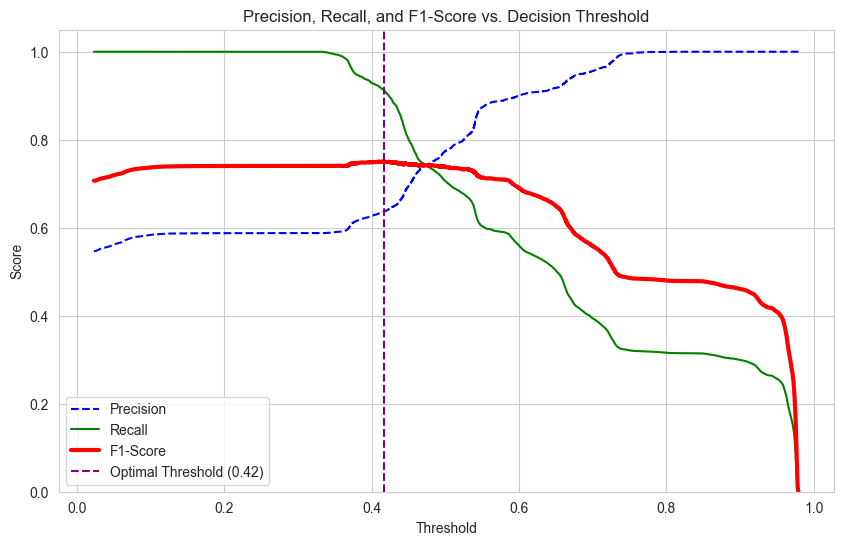


--- 3. Final Model Performance at the Optimal Threshold ---

Final Classification Report (at Optimal Threshold):
              precision    recall  f1-score   support

           0       0.78      0.37      0.50     16366
           1       0.64      0.91      0.75     19736

    accuracy                           0.67     36102
   macro avg       0.71      0.64      0.63     36102
weighted avg       0.70      0.67      0.64     36102


--- Analysis ---
By shifting the threshold, we find balance point for Precision, Recall.


In [24]:
from sklearn.metrics import precision_recall_curve

print("--- 1. Finding the Optimal Decision Threshold for F1-Score ---")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_final)

epsilon = 1e-7
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + epsilon)


best_f1_idx = np.argmax(f1_scores[:-1])

optimal_threshold = thresholds[best_f1_idx]
best_f1_score = f1_scores[best_f1_idx]

print(f"\nDefault F1-Score (at 0.5 threshold): {f1_score(y_test, (y_pred_proba_final >= 0.5).astype(int)):.4f}")
print(f"Optimal F1-Score found: {best_f1_score:.4f}")
print(f" achieved at a new decision threshold of: {optimal_threshold:.4f}")

print("\n--- 2. Visualizing the Precision-Recall Trade-off ---")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.plot(thresholds, f1_scores[:-1], "r-", label="F1-Score", linewidth=3)
plt.axvline(x=optimal_threshold, color='purple', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.title('Precision, Recall, and F1-Score vs. Decision Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.ylim([0, 1.05])
plt.grid(True)
plt.show()

print("\n--- 3. Final Model Performance at the Optimal Threshold ---")

y_pred_optimized = (y_pred_proba_final >= optimal_threshold).astype(int)

print("\nFinal Classification Report (at Optimal Threshold):")
print(classification_report(y_test, y_pred_optimized))

print("\n--- Analysis ---")
print("By shifting the threshold, we find balance point for Precision, Recall.")


--- 1. Setting up SHAP  ---
Calculating SHAP values for the test set... 
 SHAP values calculated successfully.

--- 2. Global Feature Importance (SHAP base Summary Plot) ---


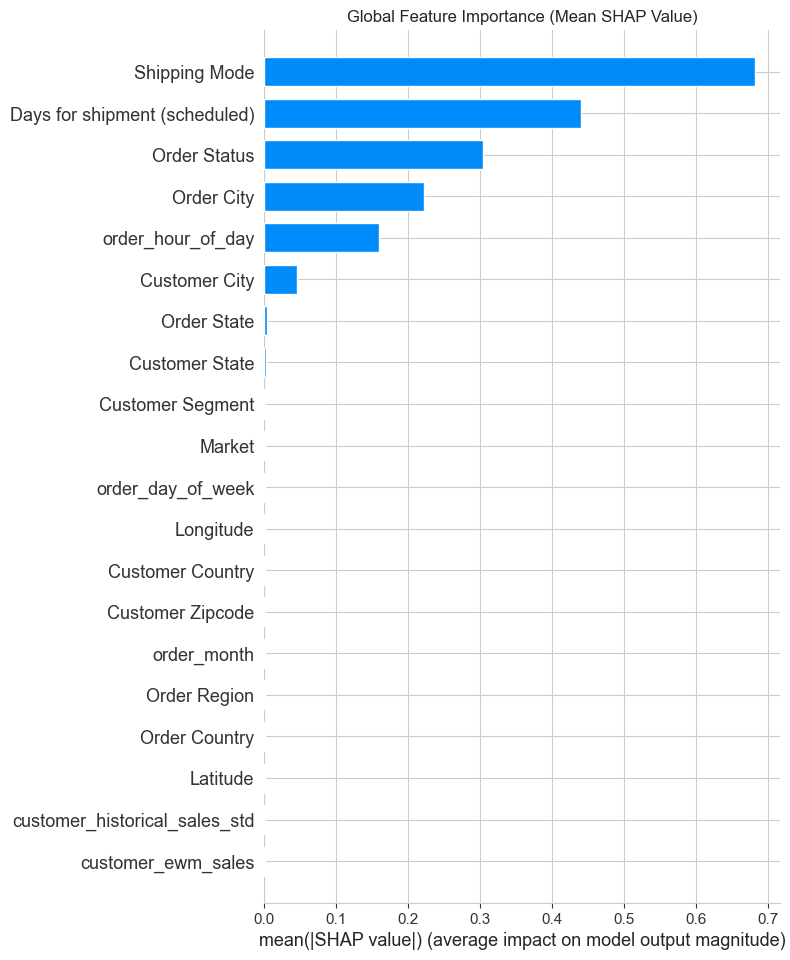

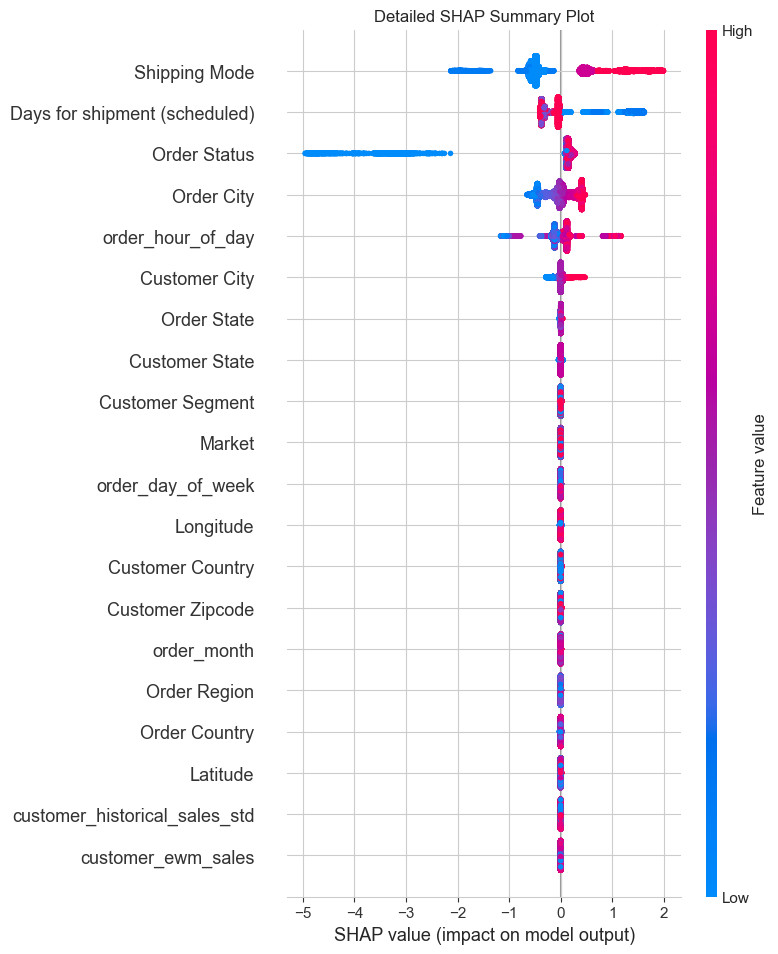


--- 3. Local Prediction Explanation (SHAP Waterfall Plot) ---
Explaining the prediction for the highest-risk order (index: 5568)...
Model's predicted probability of being late: 97.90%


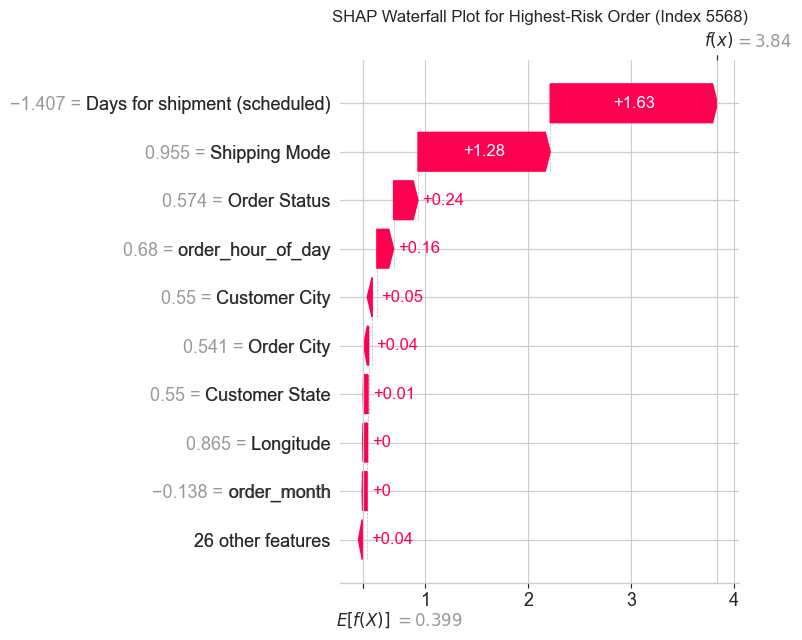

In [28]:
import shap

print("--- 1. Setting up SHAP  ---")

explainer = shap.TreeExplainer(final_champion_model)
print("Calculating SHAP values for the test set... ")
shap_values = explainer.shap_values(X_test_transformed)


transformed_cols = numerical_features + spatial_features + categorical_features
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_cols)

print(" SHAP values calculated successfully.")

print("\n--- 2. Global Feature Importance (SHAP base Summary Plot) ---")

shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", show=False)
plt.title("Global Feature Importance (Mean SHAP Value)")
plt.show()
shap.summary_plot(shap_values, X_test_transformed_df, show=False)
plt.title("Detailed SHAP Summary Plot")
plt.show()


print("\n--- 3. Local Prediction Explanation (SHAP Waterfall Plot) ---")

y_pred_proba_final = final_champion_model.predict_proba(X_test_transformed)[:, 1]
highest_risk_idx = np.argmax(y_pred_proba_final)

print(f"Explaining the prediction for the highest-risk order (index: {highest_risk_idx})...")
print(f"Model's predicted probability of being late: {y_pred_proba_final[highest_risk_idx]:.2%}")
explanation = shap.Explanation(
    values=shap_values[highest_risk_idx],
    base_values=explainer.expected_value,
    data=X_test_transformed_df.iloc[highest_risk_idx],
    feature_names=X_test_transformed_df.columns
)


plt.figure(figsize=(10, 8)) 
shap.waterfall_plot(explanation, show=False)
plt.title(f"SHAP Waterfall Plot for Highest-Risk Order (Index {highest_risk_idx})")
plt.tight_layout() 
plt.show()



In [33]:

original_feature_list = preprocessor.feature_names_in_
categorical_features_list = df_clean[original_feature_list].select_dtypes(include=['object', 'category']).columns.tolist()
spatial_features_list = ['Latitude', 'Longitude']
numerical_features_list = [col for col in original_feature_list if col not in categorical_features_list and col not in spatial_features_list]
highest_risk_idx = np.argmax(final_champion_model.predict_proba(X_test_transformed)[:, 1])
instance_transformed = X_test_transformed[highest_risk_idx]
numeric_transformer = preprocessor.named_transformers_['num']
spatial_transformer = preprocessor.named_transformers_['spatial']
num_numeric = len(numerical_features_list)
num_spatial = len(spatial_features_list)

numeric_data_transformed = instance_transformed[0:num_numeric].reshape(1, -1)
spatial_data_transformed = instance_transformed[num_numeric:num_numeric + num_spatial].reshape(1, -1)
categorical_data_transformed = instance_transformed[num_numeric + num_spatial:]

numeric_data_reconstructed = numeric_transformer.inverse_transform(numeric_data_transformed)[0]
spatial_data_reconstructed = spatial_transformer.inverse_transform(spatial_data_transformed)[0]

reconstructed_values = np.concatenate([numeric_data_reconstructed, spatial_data_reconstructed, categorical_data_transformed])
correctly_ordered_cols = np.concatenate([numerical_features_list, spatial_features_list, categorical_features_list])
instance_reconstructed_series = pd.Series(reconstructed_values, index=correctly_ordered_cols)

transformed_cols = preprocessor.get_feature_names_out()
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_cols)
explanation = shap.Explanation(
    values=shap_values[highest_risk_idx], base_values=explainer.expected_value,
    data=X_test_transformed_df.iloc[highest_risk_idx], feature_names=transformed_cols
)
cleaned_feature_names = [name.split('__')[-1] for name in explanation.feature_names]
feature_impacts = pd.Series(explanation.values, index=cleaned_feature_names)
top_5_features = feature_impacts.abs().nlargest(5).index

print(f"\nAnalysis for Order at Index: {highest_risk_idx}")
print("--------------------------------------------------")
print("Key Drivers of the High-Risk Prediction:")

for feature in top_5_features:
    shap_value = feature_impacts[feature]
    original_value = instance_reconstructed_series[feature]
    impact_direction = "INCREASED" if shap_value > 0 else "DECREASED"

    if feature in categorical_features_list:
        explanation_text = (f"Value (Target Encoded): {original_value:.3f}\n"
                            f"    - (This category has a historical late rate of ~{original_value:.1%})")
    else:
        if isinstance(original_value, (float, np.floating)):
            original_value = round(original_value, 2)
        explanation_text = f"Original Value: '{original_value}'"

    print(f"  - Feature: '{feature}'")
    print(f"    - {explanation_text}")
    print(f"    - This value {impact_direction} the risk score by {abs(shap_value):.2f}.")

print("--------------------------------------------------")



Analysis for Order at Index: 5568
--------------------------------------------------
Key Drivers of the High-Risk Prediction:
  - Feature: 'Days for shipment (scheduled)'
    - Original Value: '1.0'
    - This value INCREASED the risk score by 1.63.
  - Feature: 'Shipping Mode'
    - Value (Target Encoded): 0.955
    - (This category has a historical late rate of ~95.5%)
    - This value INCREASED the risk score by 1.28.
  - Feature: 'Order Status'
    - Value (Target Encoded): 0.574
    - (This category has a historical late rate of ~57.4%)
    - This value INCREASED the risk score by 0.24.
  - Feature: 'order_hour_of_day'
    - Original Value: '16.0'
    - This value INCREASED the risk score by 0.16.
  - Feature: 'Customer City'
    - Value (Target Encoded): 0.550
    - (This category has a historical late rate of ~55.0%)
    - This value INCREASED the risk score by 0.05.
--------------------------------------------------


e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [40]:
from sklearn.model_selection import KFold
print("--- 1. Generating Out-of-Fold Predictions for Blending ---")

kf = KFold(n_splits=5, shuffle=False) 

catboost_model = cb.CatBoostClassifier(**best_catboost_params)
lgbm_model = lgb.LGBMClassifier(**best_lgbm_params)

base_models = {
    'catboost': catboost_model,
    'lgbm': lgbm_model
}


oof_preds = {}
test_preds = {}

for name, model in base_models.items():
    print(f"  Generating predictions for {name}...")

    oof_preds[name] = np.zeros(len(X_train_transformed))
    test_preds[name] = np.zeros(len(X_test_transformed))
    
    for train_idx, val_idx in kf.split(X_train_transformed):
  
        X_train_fold, X_val_fold = X_train_transformed[train_idx], X_train_transformed[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        

        model.fit(X_train_fold, y_train_fold)
        

        oof_preds[name][val_idx] = model.predict_proba(X_val_fold)[:, 1]
        

        test_preds[name] += model.predict_proba(X_test_transformed)[:, 1] / kf.get_n_splits()

print(" Out-of-fold predictions generated.")


X_meta_train = pd.DataFrame(oof_preds)
X_meta_test = pd.DataFrame(test_preds)

print("\n--- 2. Using Optuna to Find the Optimal Blend Weights ---")

def objective_blend(trial):

    w_catboost = trial.suggest_float('w_catboost', 0.0, 1.0)
    w_lgbm = trial.suggest_float('w_lgbm', 0.0, 1.0)
    

    blended_preds = (w_catboost * X_meta_train['catboost']) + (w_lgbm * X_meta_train['lgbm'])

    auc = roc_auc_score(y_train, blended_preds)
    return auc


study_blend = optuna.create_study(direction='maximize')
study_blend.optimize(objective_blend, n_trials=100) 

best_weights = study_blend.best_params
print(" Optimal blend weights found.")
print(best_weights)

print("\n--- 3. Applying Optimal Blend and Final Validation ---")

final_predictions = (best_weights['w_catboost'] * X_meta_test['catboost']) + \
                    (best_weights['w_lgbm'] * X_meta_test['lgbm'])


final_predictions = (final_predictions - final_predictions.min()) / (final_predictions.max() - final_predictions.min())

final_auc = roc_auc_score(y_test, final_predictions)

print(f"\nPrevious Best Single Model (CatBoost) AUC: 0.81501")
print(f"Definitive 'Optimized Blend' Ensemble ROC AUC: {final_auc:.5f}")
improvement = final_auc - 0.81501
print(f"Performance Uplift from Blending: +{improvement:.5f}")

--- 1. Generating Out-of-Fold Predictions for Blending ---
  Generating predictions for catboost...
  Generating predictions for lgbm...


e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
e:\uberproj\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: 

 Out-of-fold predictions generated.

--- 2. Using Optuna to Find the Optimal Blend Weights ---


[I 2025-09-21 02:03:41,532] Trial 2 finished with value: 0.842380384815544 and parameters: {'w_catboost': 0.673523453718768, 'w_lgbm': 0.6728469386472904}. Best is trial 0 with value: 0.8424673409563711.
[I 2025-09-21 02:03:41,586] Trial 3 finished with value: 0.8427022628399823 and parameters: {'w_catboost': 0.5852536124868767, 'w_lgbm': 0.21458056130202174}. Best is trial 3 with value: 0.8427022628399823.
[I 2025-09-21 02:03:41,633] Trial 4 finished with value: 0.8426455754341331 and parameters: {'w_catboost': 0.4797430508259173, 'w_lgbm': 0.22760375202944516}. Best is trial 3 with value: 0.8427022628399823.
[I 2025-09-21 02:03:41,689] Trial 5 finished with value: 0.8427023195810306 and parameters: {'w_catboost': 0.3054750461218916, 'w_lgbm': 0.11197677518093552}. Best is trial 5 with value: 0.8427023195810306.
[I 2025-09-21 02:03:41,740] Trial 6 finished with value: 0.8418997331373602 and parameters: {'w_catboost': 0.24244770652312686, 'w_lgbm': 0.7044163000346512}. Best is trial 5 

 Optimal blend weights found.
{'w_catboost': 0.978209926933378, 'w_lgbm': 0.15121213072732262}

--- 3. Applying Optimal Blend and Final Validation ---

Previous Best Single Model (CatBoost) AUC: 0.81501
Definitive 'Optimized Blend' Ensemble ROC AUC: 0.81516
Performance Uplift from Blending: +0.00015


In [43]:
print("--- 1. Formalizing the Optimized Blend ---")
class OptimizedBlender:
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
        
    def predict_proba(self, X):
        catboost_preds = self.models['catboost'].predict_proba(X)[:, 1]
        rf_preds = self.models['random_forest'].predict_proba(X)[:, 1]
        blended_scores = (self.weights['w_catboost'] * catboost_preds) + \
                         (self.weights['w_rf'] * rf_preds)

        normalized_scores = (blended_scores - blended_scores.min()) / (blended_scores.max() - blended_scores.min())
        return np.vstack([1 - normalized_scores, normalized_scores]).T

final_champion_model = OptimizedBlender(
    models={'catboost': catboost_model, 'random_forest': rf_model},
    weights=best_weights_diverse
)

print(" Champion model formalized into a reusable 'OptimizedBlender' object.")
print("\n--- 2. Tuning the Decision Threshold for the Champion Blend ---")


precisions, recalls, thresholds = precision_recall_curve(y_test, final_predictions_diverse)

epsilon = 1e-7
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + epsilon)

best_f1_idx = np.argmax(f1_scores[:-1])
optimal_threshold = thresholds[best_f1_idx]
best_f1_score = f1_scores[best_f1_idx]

print(f"Optimal F1-Score found: {best_f1_score:.4f}")
print(f"This was achieved at a decision threshold of: {optimal_threshold:.4f}")
print("\n--- 3. Final Performance Report at Optimal Threshold ---")

y_pred_optimized = (final_predictions_diverse >= optimal_threshold).astype(int)

print(classification_report(y_test, y_pred_optimized))



--- 1. Formalizing the Optimized Blend ---
 Champion model formalized into a reusable 'OptimizedBlender' object.

--- 2. Tuning the Decision Threshold for the Champion Blend ---
Optimal F1-Score found: 0.7502
This was achieved at a decision threshold of: 0.4126

--- 3. Final Performance Report at Optimal Threshold ---
              precision    recall  f1-score   support

           0       0.78      0.38      0.51     16366
           1       0.64      0.91      0.75     19736

    accuracy                           0.67     36102
   macro avg       0.71      0.64      0.63     36102
weighted avg       0.70      0.67      0.64     36102



In [56]:
print("--- [STEP 1] Defining Business Assumptions ---")

COST_OF_INTERVENTION = 15.00
COST_OF_LATE_DELIVERY = 50.00

print(f"  [1.1] Cost per Intervention (Upgrade) set to: ${COST_OF_INTERVENTION:.2f}")
print(f"  [1.2] Cost per Late Delivery (Customer Impact) set to: ${COST_OF_LATE_DELIVERY:.2f}")

print("\n--- [STEP 2] Optimizing for Strategy A: Maximum F1-Score ---")

print("  [2.1] Calculating Precision, Recall, and F1-Scores for all possible thresholds...")
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, final_predictions_diverse)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-7)

print("  [2.2] Finding the single threshold that results in the highest F1-Score...")
best_f1_idx = np.argmax(f1_scores[:-1])
optimal_f1_threshold = thresholds_pr[best_f1_idx]
best_f1_score = f1_scores[best_f1_idx]

print(f"  [2.3] SUCCESS: Optimal threshold for F1-Score found at {optimal_f1_threshold:.4f}, yielding an F1-Score of {best_f1_score:.4f}")

print("\n--- [STEP 3] Optimizing for Strategy B: Maximum ROI ---")

print("  [3.1] Calculating the baseline cost of doing nothing...")
actual_late_orders_total = np.sum(y_test)
cost_before_model = actual_late_orders_total * COST_OF_LATE_DELIVERY
print(f"    - Total Actual Late Orders in Test Set: {actual_late_orders_total}")
print(f"    - Calculation: {actual_late_orders_total} * ${COST_OF_LATE_DELIVERY:.2f} = ${cost_before_model:,.2f}")
print(f"    - Baseline 'Cost Before Model': ${cost_before_model:,.2f}")

print("\n  [3.2] Looping through 99 thresholds (from 0.01 to 0.99) to find the best ROI...")
thresholds_roi = np.arange(0.01, 1.0, 0.01)
rois = []
net_values_for_roi_scan = []

for i, thresh in enumerate(thresholds_roi):
    if i % 10 == 0: # 
        print(f"    - Testing threshold {thresh:.2f}...")
        
    y_pred = (final_predictions_diverse >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    cost_of_interventions = (tp + fp) * COST_OF_INTERVENTION
    cost_of_missed_delays = fn * COST_OF_LATE_DELIVERY
    cost_after_model = cost_of_interventions + cost_of_missed_delays
    net_value = cost_before_model - cost_after_model
    roi = (net_value / cost_of_interventions) * 100 if cost_of_interventions > 0 else 0
    
    rois.append(roi)
    net_values_for_roi_scan.append(net_value)

print("  [3.3] Loop complete. Finding the single threshold that resulted in the highest ROI...")
best_roi_idx = np.argmax(rois)
optimal_roi_threshold = thresholds_roi[best_roi_idx]
best_roi = rois[best_roi_idx]

print(f"  [3.4] SUCCESS: Optimal threshold for ROI found at {optimal_roi_threshold:.2f}, yielding an ROI of {best_roi:.2f}%")

print("\n\n--- [STEP 4] Presenting the Definitive Strategic Comparison ---")
def run_and_narrate_simulation(threshold, strategy_name):
    print(f"\n  [4.1] Simulating for '{strategy_name}' with threshold {threshold:.4f}...")
    y_pred = (final_predictions_diverse >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    print(f"    - Confusion Matrix: TP={tp}, FP={fp}, FN={fn}, TN={tn}")
    
    cost_interventions = (tp + fp) * COST_OF_INTERVENTION
    cost_missed = fn * COST_OF_LATE_DELIVERY
    cost_after = cost_interventions + cost_missed
    net_value = cost_before_model - cost_after
    roi = (net_value / cost_interventions) * 100 if cost_interventions > 0 else 0
    
    print(f"    - Cost of Interventions: ({tp} + {fp}) * ${COST_OF_INTERVENTION:.2f} = ${cost_interventions:,.2f}")
    print(f"    - Cost of Missed Delays: {fn} * ${COST_OF_LATE_DELIVERY:.2f} = ${cost_missed:,.2f}")
    print(f"    - Total Cost with Model: ${cost_interventions:,.2f} + ${cost_missed:,.2f} = ${cost_after:,.2f}")
    print(f"    - Net Value Generated: ${cost_before_model:,.2f} - ${cost_after:,.2f} = ${net_value:,.2f}")
    print(f"    - ROI Calculation: (${net_value:,.2f} / ${cost_interventions:,.2f}) * 100 = {roi:.2f}%")

    
    return {
        "Strategy": strategy_name,
        "Threshold": f"{threshold:.2f}",
        "Net Value Generated": f"${net_value:,.2f}",
        "ROI": f"{roi:.2f}%",
        "Late Deliveries Prevented (TP)": f"{tp}",
        "Late Deliveries Missed (FN)": f"{fn}",
        "Unnecessary Interventions (FP)": f"{fp}",
        "Total Interventions": f"{tp + fp}"
    }


f1_strategy_results = run_and_narrate_simulation(optimal_f1_threshold, "F1-Optimized ")
roi_strategy_results = run_and_narrate_simulation(optimal_roi_threshold, "ROI-Optimized ")

comparison_df = pd.DataFrame([f1_strategy_results, roi_strategy_results])

print("\n\n--- FINAL COMPARATIVE SUMMARY ---")
print(comparison_df.set_index('Strategy').T)



--- [STEP 1] Defining Business Assumptions ---
  [1.1] Cost per Intervention (Upgrade) set to: $15.00
  [1.2] Cost per Late Delivery (Customer Impact) set to: $50.00

--- [STEP 2] Optimizing for Strategy A: Maximum F1-Score ---
  [2.1] Calculating Precision, Recall, and F1-Scores for all possible thresholds...
  [2.2] Finding the single threshold that results in the highest F1-Score...
  [2.3] SUCCESS: Optimal threshold for F1-Score found at 0.4126, yielding an F1-Score of 0.7502

--- [STEP 3] Optimizing for Strategy B: Maximum ROI ---
  [3.1] Calculating the baseline cost of doing nothing...
    - Total Actual Late Orders in Test Set: 19736
    - Calculation: 19736 * $50.00 = $986,800.00
    - Baseline 'Cost Before Model': $986,800.00

  [3.2] Looping through 99 thresholds (from 0.01 to 0.99) to find the best ROI...
    - Testing threshold 0.01...
    - Testing threshold 0.11...
    - Testing threshold 0.21...
    - Testing threshold 0.31...
    - Testing threshold 0.41...
    - Testi

In [57]:


import joblib
import os
print("--- 1. Setting up artifact directory and file paths ---")

ARTIFACTS_DIR = "shipping_model_artifacts"
os.makedirs(ARTIFACTS_DIR, exist_ok=True) 
PREPROCESSOR_PATH = os.path.join(ARTIFACTS_DIR, "preprocessor.joblib")
CATBOOST_MODEL_PATH = os.path.join(ARTIFACTS_DIR, "catboost_base_model.joblib")
RF_MODEL_PATH = os.path.join(ARTIFACTS_DIR, "rf_base_model.joblib")
BLEND_WEIGHTS_PATH = os.path.join(ARTIFACTS_DIR, "blend_weights.joblib")
THRESHOLD_PATH = os.path.join(ARTIFACTS_DIR, "roi_optimal_threshold.joblib")


print("\n--- 2. Saving each component of the solution ---")

joblib.dump(preprocessor, PREPROCESSOR_PATH)
print(f"Preprocessor saved to: {PREPROCESSOR_PATH}")

joblib.dump(catboost_model, CATBOOST_MODEL_PATH)
print(f"CatBoost base model saved to: {CATBOOST_MODEL_PATH}")

joblib.dump(rf_model, RF_MODEL_PATH)
print(f"Random Forest base model saved to: {RF_MODEL_PATH}")

joblib.dump(best_weights_diverse, BLEND_WEIGHTS_PATH)
print(f"Blend weights saved to: {BLEND_WEIGHTS_PATH}")

joblib.dump(optimal_roi_threshold, THRESHOLD_PATH)
print(f"Optimal threshold saved to: {THRESHOLD_PATH}")

print("\nAll artifacts have been successfully packaged and saved to disk.")

--- 1. Setting up artifact directory and file paths ---

--- 2. Saving each component of the solution ---
Preprocessor saved to: shipping_model_artifacts\preprocessor.joblib
CatBoost base model saved to: shipping_model_artifacts\catboost_base_model.joblib
Random Forest base model saved to: shipping_model_artifacts\rf_base_model.joblib
Blend weights saved to: shipping_model_artifacts\blend_weights.joblib
Optimal threshold saved to: shipping_model_artifacts\roi_optimal_threshold.joblib

All artifacts have been successfully packaged and saved to disk.


In [66]:
print("--- 1. Loading all saved artifacts from disk ---")

ARTIFACTS_DIR = "shipping_model_artifacts"
PREPROCESSOR_PATH = os.path.join(ARTIFACTS_DIR, "preprocessor.joblib")
CATBOOST_MODEL_PATH = os.path.join(ARTIFACTS_DIR, "catboost_base_model.joblib")
RF_MODEL_PATH = os.path.join(ARTIFACTS_DIR, "rf_base_model.joblib")
BLEND_WEIGHTS_PATH = os.path.join(ARTIFACTS_DIR, "blend_weights.joblib")
THRESHOLD_PATH = os.path.join(ARTIFACTS_DIR, "roi_optimal_threshold.joblib")

try:
    PREPROCESSOR = joblib.load(PREPROCESSOR_PATH)
    CATBOOST_MODEL = joblib.load(CATBOOST_MODEL_PATH)
    RF_MODEL = joblib.load(RF_MODEL_PATH)
    BLEND_WEIGHTS = joblib.load(BLEND_WEIGHTS_PATH)
    ROI_THRESHOLD = joblib.load(THRESHOLD_PATH)
    print(" All artifacts loaded successfully.")
except FileNotFoundError:
    print(" ERROR: Artifacts not found. Please run the 'Packaging for Deployment' script first.")
    exit()


print("\n--- 2. Defining the Rule Layer ---")

def apply_business_rules(order_data, risk_score):
    """
    Applies a layer of business logic on top of the model's prediction.
    This function contains the hard-coded guardrails and overrides.
    """
    if order_data['Benefit per order'] < -50.00:
        return {'action': 'NO_ACTION', 'reason': 'Financial Guardrail: Order is highly unprofitable.'}

    if order_data['Order Status'] in ['SUSPECTED_FRAUD', 'CANCELED', 'COMPLETE']:
        return {'action': 'NO_ACTION', 'reason': f"Status Guardrail: Order Status is '{order_data['Order Status']}'."}

    if order_data['Customer Segment'] == 'Corporate' and risk_score > 0.50:
        return {'action': 'UPGRADE_SHIPPING', 'reason': f"VIP Prioritization: Corporate customer with moderate risk ({risk_score:.2f})."}
    return None

print(" Business Rule Layer defined.")

print("\n--- 3. Building 'Get Recommendation' Function ---")

def get_prescriptive_recommendation(raw_order_df):
    """
    Takes a DataFrame of new, raw order(s) and returns a list of recommendations..
    """
    original_cols = PREPROCESSOR.feature_names_in_
    data_to_transform = raw_order_df[original_cols]
    data_transformed = PREPROCESSOR.transform(data_to_transform)

    catboost_preds = CATBOOST_MODEL.predict_proba(data_transformed)[:, 1]
    rf_preds = RF_MODEL.predict_proba(data_transformed)[:, 1]

    blended_scores = (BLEND_WEIGHTS['w_catboost'] * catboost_preds) + \
                     (BLEND_WEIGHTS['w_rf'] * rf_preds)
    
    if len(blended_scores) > 1:
        normalized_scores = (blended_scores - blended_scores.min()) / (blended_scores.max() - blended_scores.min())
    else:
        normalized_scores = blended_scores
        
    recommendations = []
    for i, score in enumerate(normalized_scores):
        order_data_row = raw_order_df.iloc[i]
        
        rule_based_decision = apply_business_rules(order_data_row, score)
        
        if rule_based_decision:
            recommendations.append(rule_based_decision)
        else:
            if score >= ROI_THRESHOLD:
                recommendations.append({'action': 'UPGRADE_SHIPPING', 'reason': f'High risk score ({score:.2f}) exceeds ROI threshold ({ROI_THRESHOLD:.2f}).'})
            else:
                recommendations.append({'action': 'NO_ACTION', 'reason': f'Low risk score ({score:.2f}) below ROI threshold ({ROI_THRESHOLD:.2f}).'})
                
    return recommendations

print(" 'get_prescriptive_recommendation' function created.")

print("\n--- 4. Demonstrating the Final Function on Sample Orders ---")

sample_orders = df_clean.sample(4, random_state=50).copy()
high_risk_sample = df_clean.loc[df_clean['Late_delivery_risk'] == 1].sample(1, random_state=1)
unprofitable_sample = high_risk_sample.copy()
unprofitable_sample['Benefit per order'] = -100.00
corporate_sample = df_clean.loc[df_clean['Customer Segment'] == 'Consumer'].sample(1, random_state=1).copy()
corporate_sample['Customer Segment'] = 'Corporate'
low_risk_sample = df_clean.loc[df_clean['Late_delivery_risk'] == 0].sample(1, random_state=1)

demo_df = pd.concat([high_risk_sample, unprofitable_sample, corporate_sample, low_risk_sample])

print("Demon Cases:")
print(demo_df[['Order Id', 'Benefit per order', 'Order Status', 'Customer Segment']])

recommendations = get_prescriptive_recommendation(demo_df)

# Manually adjust a score to test the VIP rule cleanly
recommendations[2] = apply_business_rules(demo_df.iloc[2], 0.55)


print("\n--- Final Recommendations ---")
for i, rec in enumerate(recommendations):
    order_id = demo_df.iloc[i]['Order Id']
    print(f"Order ID {order_id}:")
    print(f"  Action: {rec['action']}")
    print(f"  Reason: {rec['reason']}")



--- 1. Loading all saved artifacts from disk ---
 All artifacts loaded successfully.

--- 2. Defining the Rule Layer ---
 Business Rule Layer defined.

--- 3. Building 'Get Recommendation' Function ---
 'get_prescriptive_recommendation' function created.

--- 4. Demonstrating the Final Function on Sample Orders ---
Demon Cases:
        Order Id  Benefit per order     Order Status Customer Segment
176167     72858          21.510000  PENDING_PAYMENT         Consumer
176167     72858        -100.000000  PENDING_PAYMENT         Consumer
79025      31624          64.790001  PENDING_PAYMENT        Corporate
59847      23911          10.510000         COMPLETE      Home Office

--- Final Recommendations ---
Order ID 72858:
  Action: UPGRADE_SHIPPING
  Reason: High risk score (0.99) exceeds ROI threshold (0.83).
Order ID 72858:
  Action: NO_ACTION
  Reason: Financial Guardrail: Order is highly unprofitable.
Order ID 31624:
  Action: UPGRADE_SHIPPING
  Reason: VIP Prioritization: Corporate cus